## Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import re
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import requests
import json

plt.style.use('dark_background') #Use Dark Background Theme

## Import the datasets

In [2]:
file_jin1 = './dataset/glints_data_jin.json'
file_jin2 = './dataset/indeed_data_jin.json'

file_geraldine1 = './dataset/jobscrape-stjobs-geraldine.csv'
file_dave = './dataset/jobscrape_dave.csv'
file_guanfong = './dataset/jobscrape_guanfong.csv'
file_brian = './dataset/jobscrape_jobst_brian.csv'
file_john = './dataset/jobscrape_john.csv'
file_matthew = './dataset/jobscrape_matthew.csv'
file_geraldine2 = './dataset/jobscrape_mycareersfuture_geraldine.csv'
file_yenngee = './dataset/jobscrape_mycareersfuture_yenngee.csv'

In [3]:
data_jin1 = pd.read_json(file_jin1)
data_jin2 = pd.read_json(file_jin2)

data_geraldine1 = pd.read_csv(file_geraldine1)
data_dave = pd.read_csv(file_dave)
data_guanfong = pd.read_csv(file_guanfong, index_col=0)
data_brian = pd.read_csv(file_brian)
data_john = pd.read_csv(file_john)
data_matthew = pd.read_csv(file_matthew)
data_geraldine2 = pd.read_csv(file_geraldine2)
data_yenngee = pd.read_csv(file_yenngee, index_col=0)

In [4]:
# run a check on the data
data_jin1.head()

,company,jd,job_title,salary
0,UpCode Academy,\n\n### We are looking for a Data Scientist to...,Full Time Data Science Instructor,SGD 4800 - 6200 (BASIC)
1,Haulio,\n\nAs a member of Haulio’s Business Analyst t...,Business Analyst / Data Analyst,1 <span>vacancy</span>
2,JustAnalytics,\n\nJust Analytics is hiring (Senior) Data Eng...,(Senior) Data Engineer,SGD 5500 - 7500 (BASIC)
3,Talenta Pte Ltd,\n\nAvailability\n\n• Immediate preferred\n\n ...,Software Engineer,1 <span>vacancy</span>
4,Maltem Singapore,\n\nHey there! Ready to work in a start-up env...,IT Project Manager (Cognos),SGD 3500 - 5000 (BASIC)


In [5]:
data_jin2.head()

,company,jd,job_title,salary
0,Collabera,Job SummaryAbout the client: A global bank pro...,Data Analyst,"\n $5,000 a month -"
1,Dow Jones,Job Description:\nThe Data Solutions team is i...,"AML Analyst, Data Solutions, English & Chinese...","Full-time, Permanent"
2,Collabera,Job SummaryAbout the client: A global bank pro...,AML Analyst,"\n $4,500 a month -"
3,Xpand Group,Responsibilities\nConduct exploratory workshop...,Senior Data Analyst - Analytics Incubation,None
4,Apple,Apple’s Strategic Data Solutions (SDS) team le...,Data Science Analyst,None


In [6]:
data_geraldine1.head()

,company_name,job_title,job_desc,salary
0,The Supreme HR Advisory Pte Ltd,"EDM Technician[CNC EDM/ Wirecut, Preferably So...",North Attractive Salary Career Progression Op...,1250
1,BGC GROUP PTE LTD,Data Entry Officer / Public Surveyor - JP,BGC Group is hiring 50 full-time data entry of...,Undisclosed
2,Singapore Management University (SMU) ...,"Research Scientist (1-year contract), Fujitsu-...",JOB DESCRIPTION Work under supervision of Pri...,Undisclosed
3,Singapore Management University (SMU) ...,"Research Scientist (2-year contract), Living A...",JOB DESCRIPTION The Living Analytics Research...,Undisclosed
4,Vault Dragon Posted On :20 ...,Data Analyst,Responsibilities Design and implement database...,3500


In [7]:
data_dave.head()

,company,job_description,job_title,salary
0,Panasonic Asia Pacific Pte Ltd,Provide scientific technical and organizatio...,AI Engineer at Panasonic Industrial Devices Si...,NaN
1,United Overseas Bank Ltd (UOB),Functional area: Group Retail Shared ServicesE...,"AVP / Manager, Portfolio & Regulatory Manageme...",NaN
2,United Overseas Bank Ltd (UOB),Functional area: Sector Solutions GroupEmploym...,"AVP, Data Analytics (12 months contract), Sect...",NaN
3,Marina Bay Sands Pte Ltd,Contribute to the Revenue Optimization departm...,"Analyst, Business Intelligence",NaN
4,United Overseas Bank Ltd (UOB),Functional area: Group Retail Shared ServicesE...,"Assistant / Vice President, Portfolio & Regula...",NaN


In [8]:
data_guanfong.head()

,Job Title,Job Description,Salary,Company
1,"VP, Business Data Analyst, Enterprise Data Str...","VP, Business Data Analyst, Enterprise Data St...",Competitive,United Overseas Bank
2,Data Architect,An exciting Data Architect role has just bec...,SGD160000 - SGD200000 per annum + Annual & med...,Robert Walters (Singapore) Pte Ltd
4,Data Analyst,Leading the way in International Banking. We...,Negotiable,Standard Chartered Bank Singapore
5,Data Architect,Leading the way in International Banking. We...,Negotiable,Standard Chartered Bank Singapore
8,Data Manager,"This role reports to the project lead, Retai...",Negotiable,Standard Chartered Bank Singapore


In [9]:
data_brian.head()

,Job_Title,Job_Company,Job_Desc,Job_Salary_Min,Job_Salary_Max,Job_Salary_Ave
0,Data Analyst,Achieve Career Consultant Pte Ltd (Recruitment...,"S $4,000 to $5,500 Basic2 Years Contract (Subj...",4500,5500,5000
1,Data Analyst,Achieve Career Consultant Pte Ltd (Recruitment...,"S $4,000 to $5,500 Basic2 Years Contract (Subj...",4500,5500,5000
2,Data Analyst,Achieve Career Consultant Pte Ltd (Recruitment...,"S $4,000 to $5,500 Basic2 Years Contract (Subj...",4500,5500,5000
3,Data Analyst,Achieve Career Consultant Pte Ltd (Recruitment...,"S $4,500 to $5,500 Basic + Bonus2 Years Contra...",4500,5500,5000
4,Data Analyst,Achieve Career Consultant Pte Ltd (Recruitment...,"S $4,500 to $5,500 Basic2 Years Contract (Subj...",4500,5500,5000


In [10]:
data_john.head()

,jobtitle,jobdescription,salary,company
0,Data Scientist,The London-based Global-Balanced Risk Control ...,4500,Morgan Stanley
1,Data Scientist,HP is the worlds leading personal systems and ...,7100,HP Inc
2,Data Scientist,About Cubist \nCubist Systematic Strategies is...,7000,Point72
3,Data Scientist,"Data Scientist, APAC (Singapore)\n\nSingapore\...",4250,Twitter
4,Data Scientist,Henkel´s Laundry & Home Care brands have been ...,5000,Henkel


In [11]:
data_matthew.head()

,company,role,salary,JD
0,Capital Match Holdings Pte Ltd,Data Scientist / Data Analyst Intern,"$1,000 - 1,500",What You Will LearnLearn how using big data yo...
1,Carro,Data Scientist / Engineer (Analyst),"$3,000 - 6,000",Requirements- Masters/Bachelors on Econometric...
2,General Insurance Association of Singapore,Intern - Data Scientist,"$800 - 1,200","As a Data Scientist (Intern), you will be atta..."
3,Jewel Paymentech Pte Ltd,Intern – Data Scientist (ITDS17),$800,We are looking for individuals energised to se...
4,Dioworks Learning Pte Ltd,Natural Language Processing Data Scientist,"$4,000 - 5,000",ResponsibilitiesWe are looking for a Natural L...


In [12]:
data_geraldine2.head()

,company_name,job_title,job_role,job_requirement,salary
0,SG REHAB PTE. LTD.,Programme Coordinator,SG Rehab is recruiting on behalf of a client t...,Advanced/ Higher/ Certificate in Community an...,Salary undisclosed
1,PERSONNEL LINK JOBHUB PTE. LTD.,Copper Trader - Up to $10K,Copper Trader - Follow up on contracts -Develo...,-Degree with min 3 to 5 years Copper industry ...,"$5,000 - $10,000"
2,TRIPADVISOR SINGAPORE PRIVATE LIMITED,Business Development Sales Executive,We are looking for an experienced Business Dev...,What We Need From You: Extensive sales experi...,"$3,600 - $4,800"
3,GOOGLE ASIA PACIFIC PTE. LTD.,Human Resources Associate - Singapore,The role: Human Resources Associates People Op...,Minimum qualifications: BA/BS degree in Mark...,None
4,KIMLY CONSTRUCTION PRIVATE LIMITED,WSH Coordinator,To assist the WSHO/ECO in administering and i...,Minimum 2 years’ experience as a WSH coordin...,"$2,800 - $3,800"


In [13]:
#combine job role and requirement for job description
data_geraldine2['job_desc'] = data_geraldine2[['job_role', 'job_requirement']].apply(lambda x: ' '.join(x.astype(str)), axis=1)

In [14]:
data_geraldine2['job_desc'][1]

'Copper Trader - Follow up on contracts -Develop and seek for new business opportunities - Build stronger market awareness -Develope good working relationship with customer\xc2\xa0 -Monitor market situation\xc2\xa0 -Degree with min 3 to 5 years Copper\xc2\xa0industry related experiences Location: Central Salary: $5K to $10K Interested candidate, please email resume to jazmin@personnellink.com.sg'

In [15]:
data_geraldine2['job_desc'] = data_geraldine2['job_desc'].apply(lambda x: x.replace('\xc2\xa0',' '))

In [16]:
data_geraldine2['job_desc'][1]

'Copper Trader - Follow up on contracts -Develop and seek for new business opportunities - Build stronger market awareness -Develope good working relationship with customer  -Monitor market situation  -Degree with min 3 to 5 years Copper industry related experiences Location: Central Salary: $5K to $10K Interested candidate, please email resume to jazmin@personnellink.com.sg'

In [17]:
data_yenngee.head()

,job_title,company,salary,job_description
0,Senior Data Engineer,THOUGHTWORKS PTE. LTD.,"$5,700to$11,200Monthly","Roles & ResponsibilitiesSingapore, SingaporeTh..."
1,Data Scientist,Company Undisclosed,Salary undisclosed,Roles & ResponsibilitiesOur Client is an estab...
2,Data Engineer,ADDSTONES SAS,"$5,000to$10,000Monthly",Roles & ResponsibilitiesGFI is an internationa...
3,Senior Building Services Engineer (Data Centre),PM ASIA PROJECT SERVICES PTE. LTD.,"$5,500to$8,000Monthly",Roles & ResponsibilitiesOverall Job Objectives...
4,Datastage Consultant,INFINITE COMPUTER SOLUTIONS PTE LTD,"$3,000to$5,000Monthly",Roles & ResponsibilitiesJob Description Respon...


In [18]:
# as everyones data is different, going to extract the information first
job_title = list(data_yenngee.job_title) + list(data_geraldine2.job_title) + list(data_matthew.role) + list(data_john.jobtitle) + list(data_brian.Job_Title) + list(data_guanfong['Job Title']) + list(data_dave.job_title) + list(data_geraldine1.job_title) + list(data_jin1.job_title) + list(data_jin2.job_title) 
company = list(data_yenngee.company) + list(data_geraldine2.company_name) + list(data_matthew.company) + list(data_john.company) + list(data_brian.Job_Company) + list(data_guanfong.Company) + list(data_dave.company) + list(data_geraldine1.company_name) + list(data_jin1.company) + list(data_jin2.company) 
# for salary, take average
salary = list(data_yenngee.salary) + list(data_geraldine2.salary) + list(data_matthew.salary) + list(data_john.salary) + list(data_brian.Job_Salary_Ave) + list(data_guanfong.Salary) + list(data_dave.salary) + list(data_geraldine1.salary) + list(data_jin1.salary) + list(data_jin2.salary) 
job_desc = list(data_yenngee.job_description) + list(data_geraldine2.job_desc) + list(data_matthew.JD) + list(data_john.jobdescription) + list(data_brian.Job_Desc) + list(data_guanfong['Job Description']) + list(data_dave.job_description) + list(data_geraldine1.job_desc) + list(data_jin1.jd) + list(data_jin2.jd)

In [19]:
print len(job_title)
print len(company)
print len(salary)
print len(job_desc)

1836
1836
1836
1836


## Clean up

In [20]:
#putting everything together
#convert to pd
result2 = [('company', company),
          ('job_title', job_title),
          ('job_desc', job_desc),
          ('salary', salary)
         ]

df = pd.DataFrame.from_items(result2)
df2 = pd.DataFrame.from_items(result2)

In [21]:
df.head()

,company,job_title,job_desc,salary
0,THOUGHTWORKS PTE. LTD.,Senior Data Engineer,"Roles & ResponsibilitiesSingapore, SingaporeTh...","$5,700to$11,200Monthly"
1,Company Undisclosed,Data Scientist,Roles & ResponsibilitiesOur Client is an estab...,Salary undisclosed
2,ADDSTONES SAS,Data Engineer,Roles & ResponsibilitiesGFI is an internationa...,"$5,000to$10,000Monthly"
3,PM ASIA PROJECT SERVICES PTE. LTD.,Senior Building Services Engineer (Data Centre),Roles & ResponsibilitiesOverall Job Objectives...,"$5,500to$8,000Monthly"
4,INFINITE COMPUTER SOLUTIONS PTE LTD,Datastage Consultant,Roles & ResponsibilitiesJob Description Respon...,"$3,000to$5,000Monthly"


In [22]:
# check for duplicates
df[df.duplicated()]


C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\algorithms.py:471: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  labels = table.get_labels(values, uniques, 0, na_sentinel, check_nulls)


,company,job_title,job_desc,salary
102,A*STAR RESEARCH ENTITIES,Research Engineer (Data Analytics) / I2R (A*...,Roles & ResponsibilitiesAbout the Institute fo...,"$2,500to$5,000Monthly"
106,A*STAR RESEARCH ENTITIES,Scientist (Data Analytics) / I2R (A*STAR),Roles & ResponsibilitiesAbout the Institute fo...,"$4,500to$9,000Monthly"
115,A*STAR RESEARCH ENTITIES,Research Engineer (Data Analytics) / I2R (A*...,Roles & ResponsibilitiesAbout the Institute fo...,"$2,500to$5,000Monthly"
130,A*STAR RESEARCH ENTITIES,Scientist (Data Analytics) / I2R (A*STAR),Roles & ResponsibilitiesAbout the Institute fo...,"$4,500to$9,000Monthly"
149,A*STAR RESEARCH ENTITIES,Scientist (Data Analytics) / I2R (A*STAR),Roles & ResponsibilitiesAbout the Institute fo...,"$4,500to$9,000Monthly"
197,A*STAR RESEARCH ENTITIES,Scientist (Data Analytics / Deep Learning) /...,Roles & ResponsibilitiesAbout the Institute fo...,"$4,500to$9,000Monthly"
202,A*STAR RESEARCH ENTITIES,Research Engineer (Data Analytics) / I2R (A*...,Roles & ResponsibilitiesAbout the Institute fo...,"$2,500to$5,000Monthly"
207,COMTEL SOLUTIONS PTE LTD,Data Analytics Analyst,Roles & Responsibilities Perform full life-cyc...,"$6,500to$9,750Monthly"
226,TOKYO ELECTRON SINGAPORE PTE. LTD.,Semiconductor Manufacturing Equipment Data Sci...,Roles & ResponsibilitiesResponsibilities To in...,"$4,000to$7,000Monthly"
260,MOZAT PTE. LTD.,Data Engineer,Roles & Responsibilities1. Participate in R&D ...,"$3,500to$5,500Monthly"


In [23]:
df.duplicated().sum()

55

In [24]:
df = df.drop_duplicates()  # drop duplicate rows
print 'Sum of duplicates: {}'.format(df.duplicated().sum())

Sum of duplicates: 0


In [25]:
df.shape

(1781, 4)

In [26]:
df['company'].value_counts()

Company Undisclosed                                                                38
Achieve Career Consultant Pte Ltd (Recruitment Firm)                               23
Institute for Infocomm Research                                                    21
United Overseas Bank Ltd (UOB)                                                     20
The Supreme HR Advisory Pte Ltd                                                    20
RECRUIT EXPRESS PTE LTD (Recruitment Firm)                                         20
United Overseas Bank                                                               19
LOURDES GAVIN PTE. LTD.                                                            18
DBS BANK LTD.                                                                      18
Capita Pte Ltd - Technology Outsourcing (Recruitment Firm)                         17
THATZ INTERNATIONAL PTE LTD                                                        17
Grab Taxi                                             

In [27]:
# check for null values
df.isnull().sum()

company        3
job_title      0
job_desc       0
salary       247
dtype: int64

In [28]:
df[df.company.isnull()]

,company,job_title,job_desc,salary
1271,NaN,Database Developer,My client is a top-tier quantitative hedge f...,Competitive
1346,NaN,DevOps engineer,Our client is looking for a highly motivated...,Attractive
1348,NaN,Client manager,Client manager- OTC derivatives Innovative T...,Very competitive


In [29]:
df.company.fillna('Company Undisclosed',inplace = True)

In [30]:
df[df.salary.isnull()]

,company,job_title,job_desc,salary
1365,Panasonic Asia Pacific Pte Ltd,AI Engineer at Panasonic Industrial Devices Si...,Provide scientific technical and organizatio...,NaN
1366,United Overseas Bank Ltd (UOB),"AVP / Manager, Portfolio & Regulatory Manageme...",Functional area: Group Retail Shared ServicesE...,NaN
1367,United Overseas Bank Ltd (UOB),"AVP, Data Analytics (12 months contract), Sect...",Functional area: Sector Solutions GroupEmploym...,NaN
1368,Marina Bay Sands Pte Ltd,"Analyst, Business Intelligence",Contribute to the Revenue Optimization departm...,NaN
1369,United Overseas Bank Ltd (UOB),"Assistant / Vice President, Portfolio & Regula...",Functional area: Group Retail Shared ServicesE...,NaN
1370,United Overseas Bank Ltd (UOB),"Assistant Vice President, Country & Credit Ris...",Functional area: Risk ManagementEmployment typ...,NaN
1371,Marina Bay Sands Pte Ltd,"Associate Analyst/Analyst, Gaming Analytics",Contribute to the Revenue Optimization departm...,NaN
1372,Micron Semiconductor Asia,BIG DATA ENGINEER,Req. ID: 88661...Responsibilities:.p.p.,NaN
1375,Haulio Pte Ltd,Data Analyst,As a member of Haulios Business Analyst team ...,NaN
1377,Williams-Sonoma Singapore Pte Ltd,Data Analyst ( 1 Year contract ),JOB PURPOSE:.We are looking for a Data Analyst...,NaN


In [31]:
df.salary.fillna('Salary Undisclosed',inplace = True)

In [32]:
df.loc[df['salary'].str.contains('annum', na=False)]

,company,job_title,job_desc,salary
1226,Robert Walters (Singapore) Pte Ltd,Data Architect,An exciting Data Architect role has just bec...,SGD160000 - SGD200000 per annum + Annual & med...
1275,McGregor Boyall Associates Pte Ltd (Singapore),Senior SAS Programmer,Senior SAS Programmer needed for a global fi...,SGD80000 - SGD160000 per annum
1326,Cobalt Recruitment,Operations Analyst,Our client is a global alternative investmen...,SGD60000.00 - SGD72000.00 per annum + Competit...
1337,Standard Chartered Bank Singapore,HTML5 UI Developer,Due to increasing demand by regulators and by...,SGD1 - SGD200000.0 per annum
1355,Huxley APAC,Senior Devops Engineer,A global fintech firm with a strategic base ...,SGD150000 - SGD180000 per annum
1356,Ambition Singapore,Risk Analyst,A global leading hedge fund is seeking a Ris...,Up to SGD120000.00 per annum


In [33]:
df.loc[df['salary'].str.contains('K', na=False)]

,company,job_title,job_desc,salary
1243,Kaskal Executive,Enterprise Data Strategy Consultant,Joining a dynamic and growing team to that l...,Up to 140K + Attractive Bonus
1294,Kaskal Executive,Financial Analytics and Strategy,This is a growth role with a highly reputabl...,Up to 120K + Attractive Bonus
1339,DATASEARCH CONSULTING PTE. LTD.,"Technofunctional Consultant (IFRS 9, Regulator...",Global Financial Technology vendor | Deliver...,SGD 100K Base + Bonus


In [34]:
df.loc[df['salary']<10]

,company,job_title,job_desc,salary


In [35]:
df.loc[df['salary'].str.contains('\n', na=False)]

,company,job_title,job_desc,salary
1582,Collabera,Data Analyst,Job SummaryAbout the client: A global bank pro...,"\n $5,000 a month -"
1584,Collabera,AML Analyst,Job SummaryAbout the client: A global bank pro...,"\n $4,500 a month -"
1597,Collabera,Operation Analyst - Ticketing Experience,About the client: A leading social media platf...,"\n $4,000 a month -"
1610,E Protections Pte Ltd,Data Analyst,Understand business logics from domain experts...,"\n $3,000 - $5,000 a month"
1613,DC Frontiers,Data Operations Analyst,DC Frontiers is a financial and regulation tec...,"\n $2,500 - $3,200 a month"
1619,Softenger Singapore Pte Ltd,Data Center Operations Analyst,Salary will be max 4000 SGD. (No Shift allowan...,"\n $4,000 - $5,300 a month -"
1620,HP Wealth Management (S) Pte Ltd,Operations Officer,JOB DESCRIPTION ObjectivesThe operations offic...,"\n $4,000 - $4,500 a month"
1660,Collabera,Financial Analyst,About the client: A global bank providing fina...,"\n $3,700 a month -"
1669,AL Capital Holdings,Equity Analyst - Associate/Graduate Level,The Equity Analyst position is created strateg...,"\n $60,000 a year"
1683,Collabera,Talent Acquisition Recruiter,Job SummaryAbout the client: A leading social ...,"\n $7,000 - $8,000 a month -"


In [36]:
workweeks=50
#48 hours a week accoridng to MOM
workhours=48

def salary_cleaner(s):
    try:
        if 'Monthly' in s or 'Month' in s or 'month' in s:
            sal = re.findall(r'[0-9.]+',s.replace('$','').replace(',',''))
            return round(np.mean([float(i) for i in sal]))
        elif 'annum' in s or 'year' in s or 'Year' in s or 'Annually' in s:
            sal = re.findall(r'[0-9.]+',s.replace('$','').replace(',',''))
            return round(np.mean([float(i) for i in sal])/12,2)
        elif 'hour' in s or 'Hour' in s:
            #there's 52 weeks in a year, take it as 50 work week and 48 work hours a week
            sal = re.findall(r'[0-9.]+',s.replace('$','').replace(',',''))
            return round(np.mean([float(i) for i in sal])*workweeks*workhours)
        elif 'BASIC' in s:
            sal = re.findall(r'[0-9.]+',s.replace('$','').replace(',',''))
            if sal[0] > 100:
                return round(np.mean([float(i) for i in sal]))
            else:
                return round(np.mean([float(i) for i in sal])/12,2)
        elif 'K' in s:
            sal = re.findall(r'[0-9.]+',s.replace('$','').replace(',',''))
            return round((np.mean([float(i) for i in sal])*1000)/12)
        elif 'vacancy' in s or 'vacancies' in s:
            return 'Salary Undisclosed'
        else:
            try:
                sal = re.findall(r'[0-9.]+',s.replace('$','').replace(',',''))
                return round(np.mean([float(i) for i in sal]))
            except:
                pass
        
    except TypeError:
        pass
    
    return

In [37]:
df['salary'] = df['salary'].map(salary_cleaner)

C:\ProgramData\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda2\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [38]:
df['salary'].value_counts()

6000.0                30
4500.0                28
4000.0                24
5000.0                24
7500.0                22
3000.0                22
6500.0                21
5500.0                20
Salary Undisclosed    20
8000.0                20
6750.0                19
3750.0                16
3500.0                15
10000.0               14
1000.0                13
1150.0                12
4750.0                12
9000.0                12
800.0                 12
2500.0                11
5250.0                11
900.0                  9
4250.0                 9
7000.0                 9
2000.0                 8
9750.0                 8
5750.0                 7
6250.0                 7
2850.0                 7
700.0                  7
                      ..
9583.33                1
2550.0                 1
5625.0                 1
13500.0                1
150000.0               1
10.0                   1
240000.0               1
4700.0                 1
5218.0                 1


In [39]:
# tracing salary with odd values
df.loc[df['salary']<600]

,company,job_title,job_desc,salary
199,SGTech,information technology,Roles & ResponsibilitiesTalentGuru\r\n(www.tal...,1
1384,3top Consulting Pte Ltd,Data Scientist,RESPONSIBILITIES:..Work with internal and exte...,429.17
1398,Tokyo Electron Singapore,Semiconductor Manufacturing Equipment Data Sci...,Responsibilities..To integrate TELs tool and c...,458.33
1405,OakTree Consulting,"Senior Software Engineers(C++, Go, Node.js, Ja...",Responsibilities: .□ Gather and analyze busine...,500
1406,OakTree Consulting,"Senior Software Engineers(C++, Go, Node.js, Ja...",Responsibilities: .□ Gather and analyze busine...,458.33
1407,OakTree Consulting,"Senior Software Engineers(C++, Go, Node.js, Ja...",Responsibilities: .□ Gather and analyze busine...,500
1410,Optimum Solutions (S) Pte Ltd,"Software Engineer, Full Stack (Node.JS, Python...",This is a Direct Hire position Permanent with...,541.67
1547,Talent Hunt 2,test,\n\n \n\n,3
1559,AIMIA,Lead Consultant -Insight &amp;Analytics,"\n\n#\n\nLead Consultant, Analytics & Insights...",10


In [40]:
#checking against the unaffected copy
#we're going to drop them
print df2.iloc[199]
print df2.iloc[1384]
print df2.iloc[1398]
print df2.iloc[1547]
print df2.iloc[1559]

company                                                 SGTech
job_title                               information technology
job_desc     Roles & ResponsibilitiesTalentGuru\r\n(www.tal...
salary                                           $1to$1Monthly
Name: 199, dtype: object
company                                3top Consulting Pte Ltd
job_title                                       Data Scientist
job_desc     RESPONSIBILITIES:..Work with internal and exte...
salary                            5,000 SGD - 5,300 SGD / Year
Name: 1384, dtype: object
company                               Tokyo Electron Singapore
job_title    Semiconductor Manufacturing Equipment Data Sci...
job_desc     Responsibilities..To integrate TELs tool and c...
salary                            4,000 SGD - 7,000 SGD / Year
Name: 1398, dtype: object
company           Talent Hunt 2
job_title                  test
job_desc             \n\n  \n\n
salary       SGD 1 - 5  (BASIC)
Name: 1547, dtype: object
company      

In [41]:
#drops these rows
df = df[df['salary']>600]

In [42]:
# cleaning the job details
df.loc[df['job_desc'].str.contains('\n', na=False)]

,company,job_title,job_desc,salary
0,THOUGHTWORKS PTE. LTD.,Senior Data Engineer,"Roles & ResponsibilitiesSingapore, SingaporeTh...",8450
2,ADDSTONES SAS,Data Engineer,Roles & ResponsibilitiesGFI is an internationa...,7500
3,PM ASIA PROJECT SERVICES PTE. LTD.,Senior Building Services Engineer (Data Centre),Roles & ResponsibilitiesOverall Job Objectives...,6750
4,INFINITE COMPUTER SOLUTIONS PTE LTD,Datastage Consultant,Roles & ResponsibilitiesJob Description Respon...,4000
5,CITIBANK N.A.,O&T - Data Analyst Lead - 18035524,Roles & Responsibilities You will interface wi...,13750
6,PROCTER & GAMBLE INTERNATIONAL OPERATIONS SA S...,Research & Development - Data Scientist - Hair...,Roles & ResponsibilitiesAt P&G we leverage adv...,8000
8,ECNET LIMITED,DWH Consultant,Roles & ResponsibilitiesDesign a BI Solution M...,6500
9,OVERSEA-CHINESE BANKING CORPORATION LIMITED,"Data Analyst, Group Customer Analytics & Decis...",Roles & Responsibilities\r\n What youll do Wor...,7000
11,Company Undisclosed,Data Warehouse and Reporting Specialist,Roles & ResponsibilitiesAPPLICANTS HAVE TO APP...,10500
12,OAK CONSULTING PTE. LTD.,Data Scientist,Roles & ResponsibilitiesData Scientist - with ...,8000


In [43]:
def job_cleaner(j):
    #remove remove N from string
    j = j.rstrip("\r\n")
    #remove all the special characters
    j = re.sub('[^A-Za-z0-9]+', ' ', j)
    #split any joined words
    #convert to lower
    text=''
    for word in j.lower().strip().split(' '):
        check=viterbi_segment(word)[0]
        tmp=len(check)
        # print word, check, tmp
        if(tmp==1): 
            text+=word
        elif(tmp==2) and (len(check[1])>1): 
            text+=' '.join(check)
        elif(tmp>1): 
            if(len(check[0])>3):
                text+=str(check[0])+ ' ' +''.join(check[1:])
            else:
                text+=str(check[0])+''.join(check[1:])
        else: 
            continue
        text+=' '
    return text

In [44]:
#SPLIT JOINED WORDS
import re
from collections import Counter

def viterbi_segment(text):
    probs, lasts = [1.0], [0]
    for i in range(1, len(text) + 1):
        prob_k, k = max((probs[j] * word_prob(text[j:i]), j)
                        for j in range(max(0, i - max_word_length), i))
        probs.append(prob_k)
        lasts.append(k)
    words = []
    i = len(text)
    while 0 < i:
        words.append(text[lasts[i]:i])
        i = lasts[i]
    words.reverse()
    return words, probs[-1]

def word_prob(word): return dictionary[word] / total
def words(text): return re.findall('[a-z]+', text.lower()) 
dictionary = Counter(words(open('big.txt').read()))
max_word_length = max(map(len, dictionary))
total = float(sum(dictionary.values()))

viterbi_segment('responsibilitiesbusiness') #Example
viterbi_segment('responsibilitiesgfi')

(['responsibilities', 'g', 'f', 'i'], 2.6305262602852614e-16)

In [45]:
# df['job_desc'].map(job_cleaner)
a = df.iloc[1]['job_desc']

#testing the function
job_cleaner(a)

'roles responsibilities gfi is an international it services company currently employing about 18 000 people worldwide gfi provides its clients with innovative long lasting industrial solutions to lever age performance from their information systems management consulting digital transformation innovation operating over 20 countries 2017 revenue of over 1 2 billion usd 48 years of existence in order to support our forthcoming business and technological challenges we seek innovative and agile people sharing our mind set we are now looking for a data engineer to join our team in singapore general presentation of the position part of cib it architecture digital and transformation the it digital accelerator platform accelerator team is in charge of accelerating the delivery of products from lab to prod coordinating the correct usage of our platform expanding and managing the digital expert community one of the platform we are working on is the apac data solution this solution will be used fo

In [46]:
df['job_desc'] = df['job_desc'].map(job_cleaner)

In [47]:
# cleaning up the company and job title column
# removing any formatting like '\n'
def title_cleaner(c):
    #remove remove N from string
    c = c.rstrip("\r\n")
    c = c.strip().replace('.', '')
    return c.upper()

In [48]:
df['company'] = df['company'].map(title_cleaner)
df['job_title'] = df['job_title'].map(title_cleaner)

In [49]:
df.head()

,company,job_title,job_desc,salary
0,THOUGHTWORKS PTE LTD,SENIOR DATA ENGINEER,roles responsibilities singapore singaporethou...,8450
2,ADDSTONES SAS,DATA ENGINEER,roles responsibilities gfi is an international...,7500
3,PM ASIA PROJECT SERVICES PTE LTD,SENIOR BUILDING SERVICES ENGINEER (DATA CENTRE),roles responsibilities overall job objectives ...,6750
4,INFINITE COMPUTER SOLUTIONS PTE LTD,DATASTAGE CONSULTANT,roles responsibilities job description respons...,4000
5,CITIBANK NA,O&T - DATA ANALYST LEAD - 18035524,roles responsibilities you will interface with...,13750


In [50]:
df['salary'].value_counts()
#for the sake to allow the column to be calculated properly, the 'Salary Undisclosed' will be nul values instead
df[df['salary']=='Salary Undisclosed']

def convert_tonull(x):
    if x == 'Salary Undisclosed':
        return None
    else:
        return x

df['salary'] = df['salary'].apply(convert_tonull)

In [51]:
df['salary'].isnull().sum()

20

In [52]:
df['company'].value_counts()

COMPANY UNDISCLOSED                               34
THE SUPREME HR ADVISORY PTE LTD                   24
LOURDES GAVIN PTE LTD                             18
DBS BANK LTD                                      18
THATZ INTERNATIONAL PTE LTD                       17
A*STAR RESEARCH ENTITIES                          14
6ESTATES PTE LTD                                  10
WUNDERMAN SINGAPORE                                8
ALLEGIS GROUP SINGAPORE PRIVATE LIMITED            7
INFINITE COMPUTER SOLUTIONS PTE LTD                7
E-BRIDGE PRE-SCHOOL PTE LTD                        7
AMARISAI PTE LTD                                   6
KELLY SERVICES (SINGAPORE) PTE LTD                 6
CREDIT SUISSE AG                                   6
NCS PTE LTD                                        6
PERSONNEL LINK JOBHUB PTE LTD                      5
COLLABERA                                          5
JPMORGAN CHASE BANK, NA                            5
OVERSEA-CHINESE BANKING CORPORATION LIMITED   

In [53]:
df['job_title'].value_counts()

DATA SCIENTIST                                                                                         46
DATA ANALYST                                                                                           33
DATA ENGINEER                                                                                          23
SENIOR DATA ENGINEER                                                                                    5
SCIENTIST (DATA ANALYTICS)  /  I2R (A*STAR)                                                             5
DATA SCIENTIST INTERN                                                                                   4
DATA ANALYST INTERN                                                                                     4
QUANTITATIVE ANALYST                                                                                    4
ACCOUNT COORDINATOR INTERN (ADVERTISING)                                                                4
DATA SCIENTIST INTERNSHIP                     

In [54]:
#Feature engineering
#We have too many job titles so categorizing them instead
#create a category column
#if job posting is for a data scientist, the category will be scientist

engineer_role = ['engineer','deve','architect', 'program','miner','algorithm','operation', 'ops', 'data']
leader_role = ['head','director','manager','consult','lead','vp','presi','chief','vice']

def category_check(jobtitle):
    jobtitle=str(jobtitle).lower()
    cat = 'other'
    
    for item in engineer_role:
        if item in jobtitle:
            cat="engineer"
            break
            
    for item in leader_role:
        if item in jobtitle:
            cat = "management"
            break
    
    #if it's an scientist or research job
    if "analyst" in jobtitle in jobtitle:
        cat = 'analyst'
    #if it's an scientist or research job
    if "scien" in jobtitle or "research" in jobtitle:
        cat = 'scientist'
    if "contract" in jobtitle:
        cat= 'contract'
    #if it's an admin job
    if "admin" in jobtitle:
        cat = 'admin'
    #if it's an intern job
    if "intern" in jobtitle:
        cat = 'intern'
        
    return cat

#testing the function
print category_check('DATA ANALYST / DATA SCIENTIST')
print category_check('PRESCHOOL ASSISTANT TEACHER')
print category_check('ADMIN ASSISTANT / DATA ENTRY / ACCOUNT ASSISTANT')
print category_check('ADMIN ASSISTANT INTERN')

df['category'] = df.job_title.apply(category_check)

scientist
other
admin
intern


In [55]:
# programing language mentioned in job description
# check if python, sql, javascript

def check_python(jobdesc):
    ans = 0
    for word in str(jobdesc).split(' '):
        if 'python' in word:
            ans = 1
            break
    return ans

def check_java(jobdesc):
    ans = 0
    for word in str(jobdesc).split(' '):
        if 'java' in word:
            ans = 1
            break
    return ans

def check_sql(jobdesc):
    ans = 0
    for word in str(jobdesc).split(' '):
        if 'sql' in word:
            ans = 1
            break
    return ans

def check_hadoop(jobdesc):
    ans = 0
    for word in str(jobdesc).split(' '):
        if 'hadoop' in word:
            ans = 1
            break
    return ans

df['need_python'] = df.job_desc.apply(check_python)
df['need_java'] = df.job_desc.apply(check_java)
df['need_sql'] = df.job_desc.apply(check_sql)
df['need_hadoop'] = df.job_desc.apply(check_hadoop)

In [56]:
df.head()

,company,job_title,job_desc,salary,category,need_python,need_java,need_sql,need_hadoop
0,THOUGHTWORKS PTE LTD,SENIOR DATA ENGINEER,roles responsibilities singapore singaporethou...,8450.0,engineer,0,1,1,1
2,ADDSTONES SAS,DATA ENGINEER,roles responsibilities gfi is an international...,7500.0,engineer,1,1,1,1
3,PM ASIA PROJECT SERVICES PTE LTD,SENIOR BUILDING SERVICES ENGINEER (DATA CENTRE),roles responsibilities overall job objectives ...,6750.0,management,0,0,0,0
4,INFINITE COMPUTER SOLUTIONS PTE LTD,DATASTAGE CONSULTANT,roles responsibilities job description respons...,4000.0,management,0,0,1,0
5,CITIBANK NA,O&T - DATA ANALYST LEAD - 18035524,roles responsibilities you will interface with...,13750.0,analyst,1,0,0,1


In [57]:
df.isnull().sum()

company         0
job_title       0
job_desc        0
salary         20
category        0
need_python     0
need_java       0
need_sql        0
need_hadoop     0
dtype: int64

## Checkpoint: Make a copy of the df and EDA

In [58]:
#this copy of data do not have the null values in salary
data = df[df.salary.notnull()].copy()

In [59]:
data.head()

,company,job_title,job_desc,salary,category,need_python,need_java,need_sql,need_hadoop
0,THOUGHTWORKS PTE LTD,SENIOR DATA ENGINEER,roles responsibilities singapore singaporethou...,8450.0,engineer,0,1,1,1
2,ADDSTONES SAS,DATA ENGINEER,roles responsibilities gfi is an international...,7500.0,engineer,1,1,1,1
3,PM ASIA PROJECT SERVICES PTE LTD,SENIOR BUILDING SERVICES ENGINEER (DATA CENTRE),roles responsibilities overall job objectives ...,6750.0,management,0,0,0,0
4,INFINITE COMPUTER SOLUTIONS PTE LTD,DATASTAGE CONSULTANT,roles responsibilities job description respons...,4000.0,management,0,0,1,0
5,CITIBANK NA,O&T - DATA ANALYST LEAD - 18035524,roles responsibilities you will interface with...,13750.0,analyst,1,0,0,1


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 1822
Data columns (total 9 columns):
company        668 non-null object
job_title      668 non-null object
job_desc       668 non-null object
salary         668 non-null float64
category       668 non-null object
need_python    668 non-null int64
need_java      668 non-null int64
need_sql       668 non-null int64
need_hadoop    668 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 52.2+ KB


In [61]:
data.isnull().sum()

company        0
job_title      0
job_desc       0
salary         0
category       0
need_python    0
need_java      0
need_sql       0
need_hadoop    0
dtype: int64

In [62]:
data.category.value_counts()

engineer      160
scientist     132
other         112
analyst       105
management     78
intern         50
admin          17
contract       14
Name: category, dtype: int64

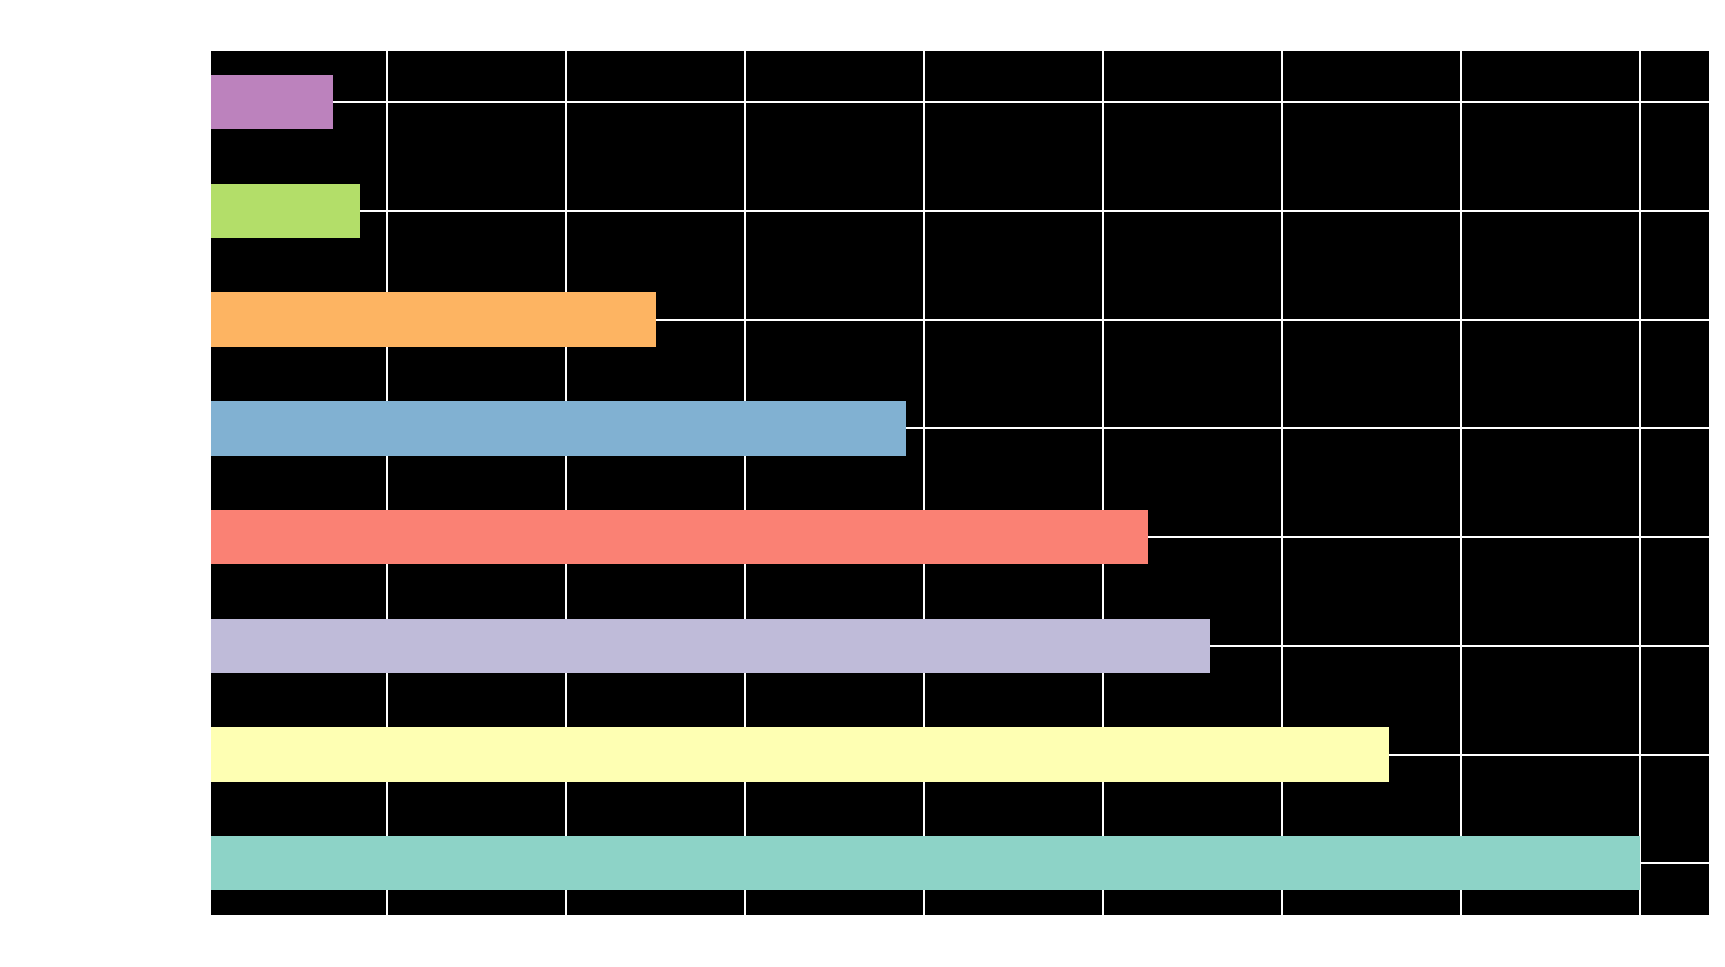

In [63]:
data['category'].value_counts().plot(kind='barh', figsize=(12,8), fontsize=14, title='Job Distribution by Category')

category
admin          2782.352941
analyst        7646.780952
contract       4927.357143
engineer       6210.877375
intern         1174.500000
management    15927.141026
other          3682.232143
scientist      8217.065682
Name: salary, dtype: float64


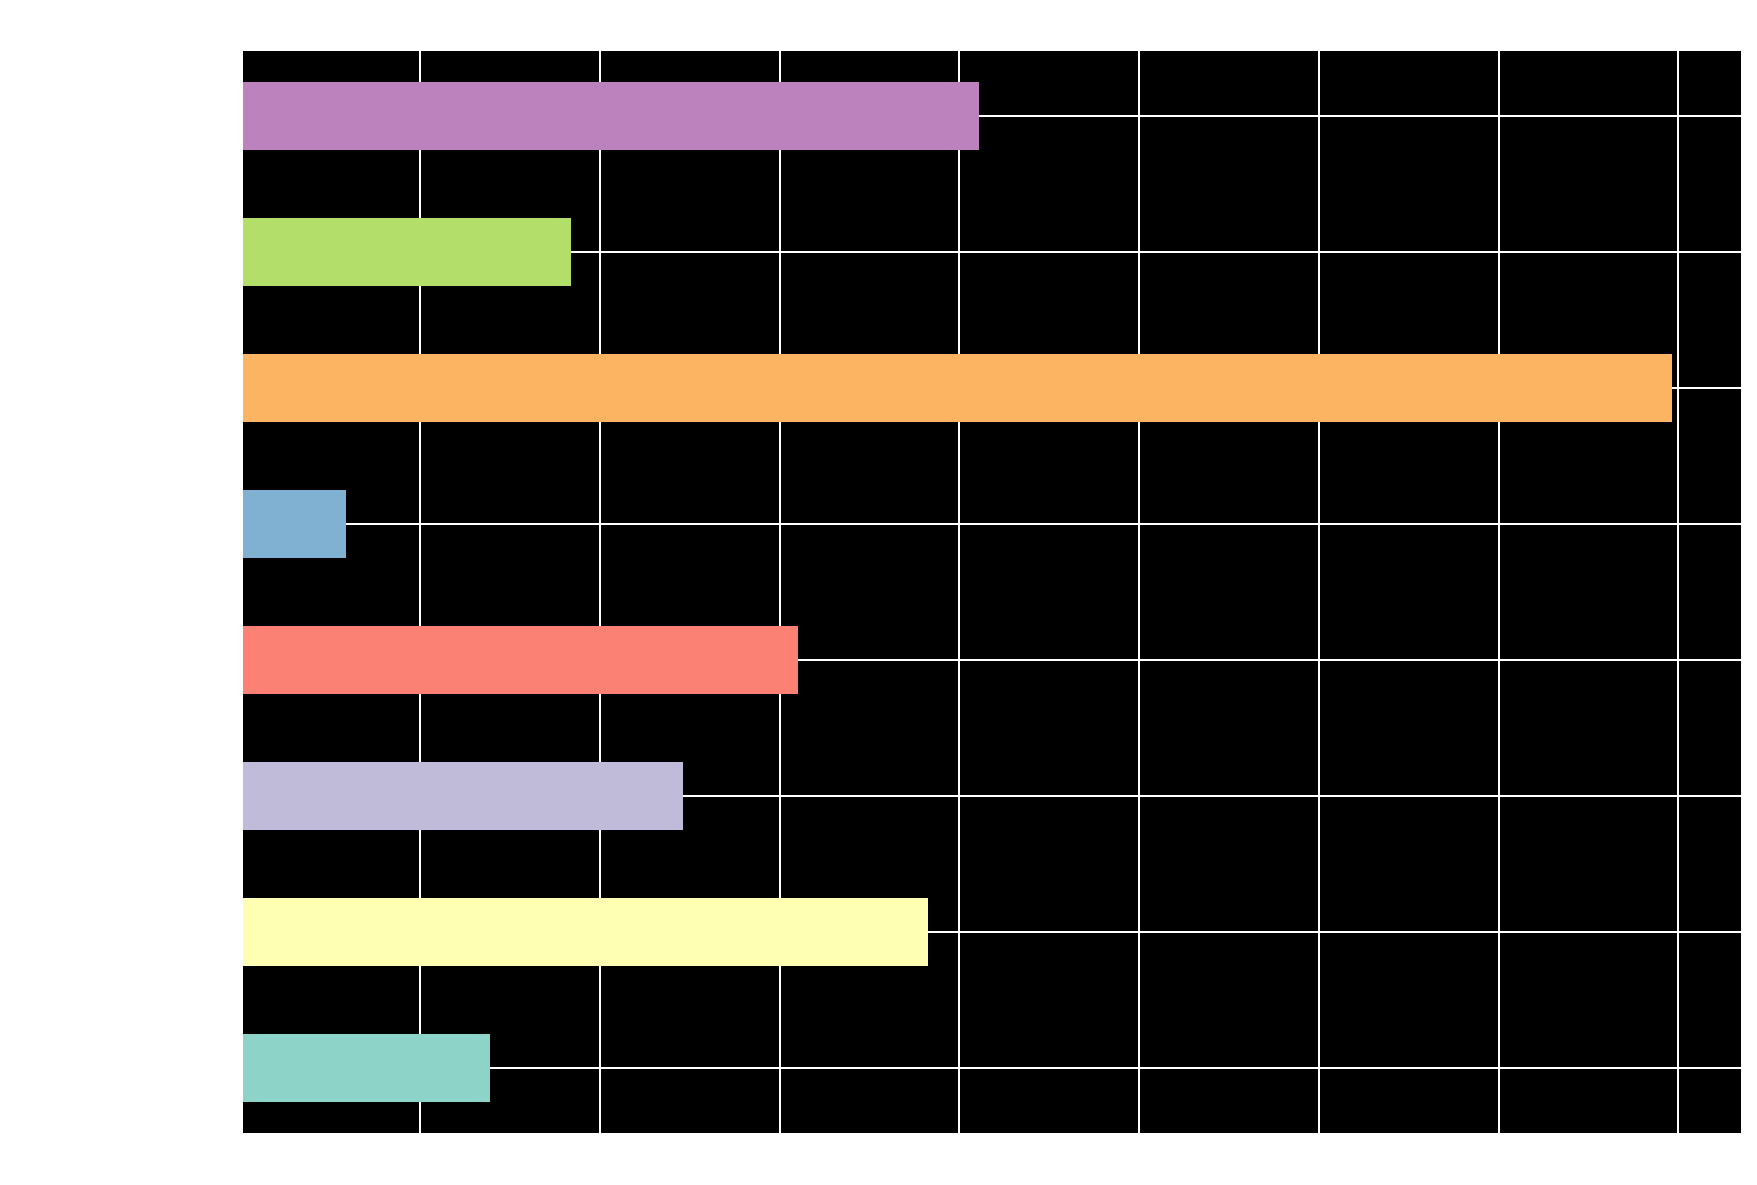

In [64]:
# col = data.category.value_counts().index
# data['category'].value_counts().plot(kind='bar', figsize=(10,8))
print data.groupby(['category']).salary.mean()
data.groupby(['category']).salary.mean().plot(kind='barh', figsize=(12, 10), title='The Salary Mean by Category', fontsize=14)

In [65]:
print 'Max Salary by category'
print data.groupby(['category']).salary.max()
print '-----------------------------------------------'
print 'Min Salary by category'
print data.groupby(['category']).salary.min()

Max Salary by category
category
admin           8250.0
analyst       200000.0
contract        9000.0
engineer       96000.0
intern         10000.0
management    240000.0
other          12500.0
scientist     150000.0
Name: salary, dtype: float64
-----------------------------------------------
Min Salary by category
category
admin          800.0
analyst        700.0
contract      1750.0
engineer      1000.0
intern         700.0
management    1800.0
other          625.0
scientist      700.0
Name: salary, dtype: float64


In [66]:
# Creating a salary range for the data
def salary_range(salary):
    if salary < 1000:
        return '<1k'
    elif salary < 2000:
        return '1k - 2k'
    elif salary < 3000:
        return '2k - 3k'
    elif salary < 4000:
        return '3k - 4k'
    elif salary < 5000:
        return '2k - 5k'
    elif salary < 6000:
        return '5k - 6k'
    elif salary < 7000:
        return '6k - 7k'
    elif salary < 8000:
        return '7k - 8k'
    elif salary < 9000:
        return '8k - 9k'
    elif salary < 10000:
        return '9k - 10k'
    else:
        return '>10k'
    
salary_range(7923)

'7k - 8k'

In [67]:
data['salary_range']=data.salary.apply(salary_range)

In [68]:
print data.salary_range.value_counts()

2k - 5k     92
6k - 7k     86
3k - 4k     79
2k - 3k     71
5k - 6k     69
1k - 2k     66
>10k        65
8k - 9k     42
7k - 8k     37
<1k         34
9k - 10k    27
Name: salary_range, dtype: int64


In [69]:
data.head()

,company,job_title,job_desc,salary,category,need_python,need_java,need_sql,need_hadoop,salary_range
0,THOUGHTWORKS PTE LTD,SENIOR DATA ENGINEER,roles responsibilities singapore singaporethou...,8450.0,engineer,0,1,1,1,8k - 9k
2,ADDSTONES SAS,DATA ENGINEER,roles responsibilities gfi is an international...,7500.0,engineer,1,1,1,1,7k - 8k
3,PM ASIA PROJECT SERVICES PTE LTD,SENIOR BUILDING SERVICES ENGINEER (DATA CENTRE),roles responsibilities overall job objectives ...,6750.0,management,0,0,0,0,6k - 7k
4,INFINITE COMPUTER SOLUTIONS PTE LTD,DATASTAGE CONSULTANT,roles responsibilities job description respons...,4000.0,management,0,0,1,0,2k - 5k
5,CITIBANK NA,O&T - DATA ANALYST LEAD - 18035524,roles responsibilities you will interface with...,13750.0,analyst,1,0,0,1,>10k


category
admin          0
analyst       31
contract       4
engineer      54
intern        17
management    11
other          3
scientist     99
Name: need_python, dtype: int64


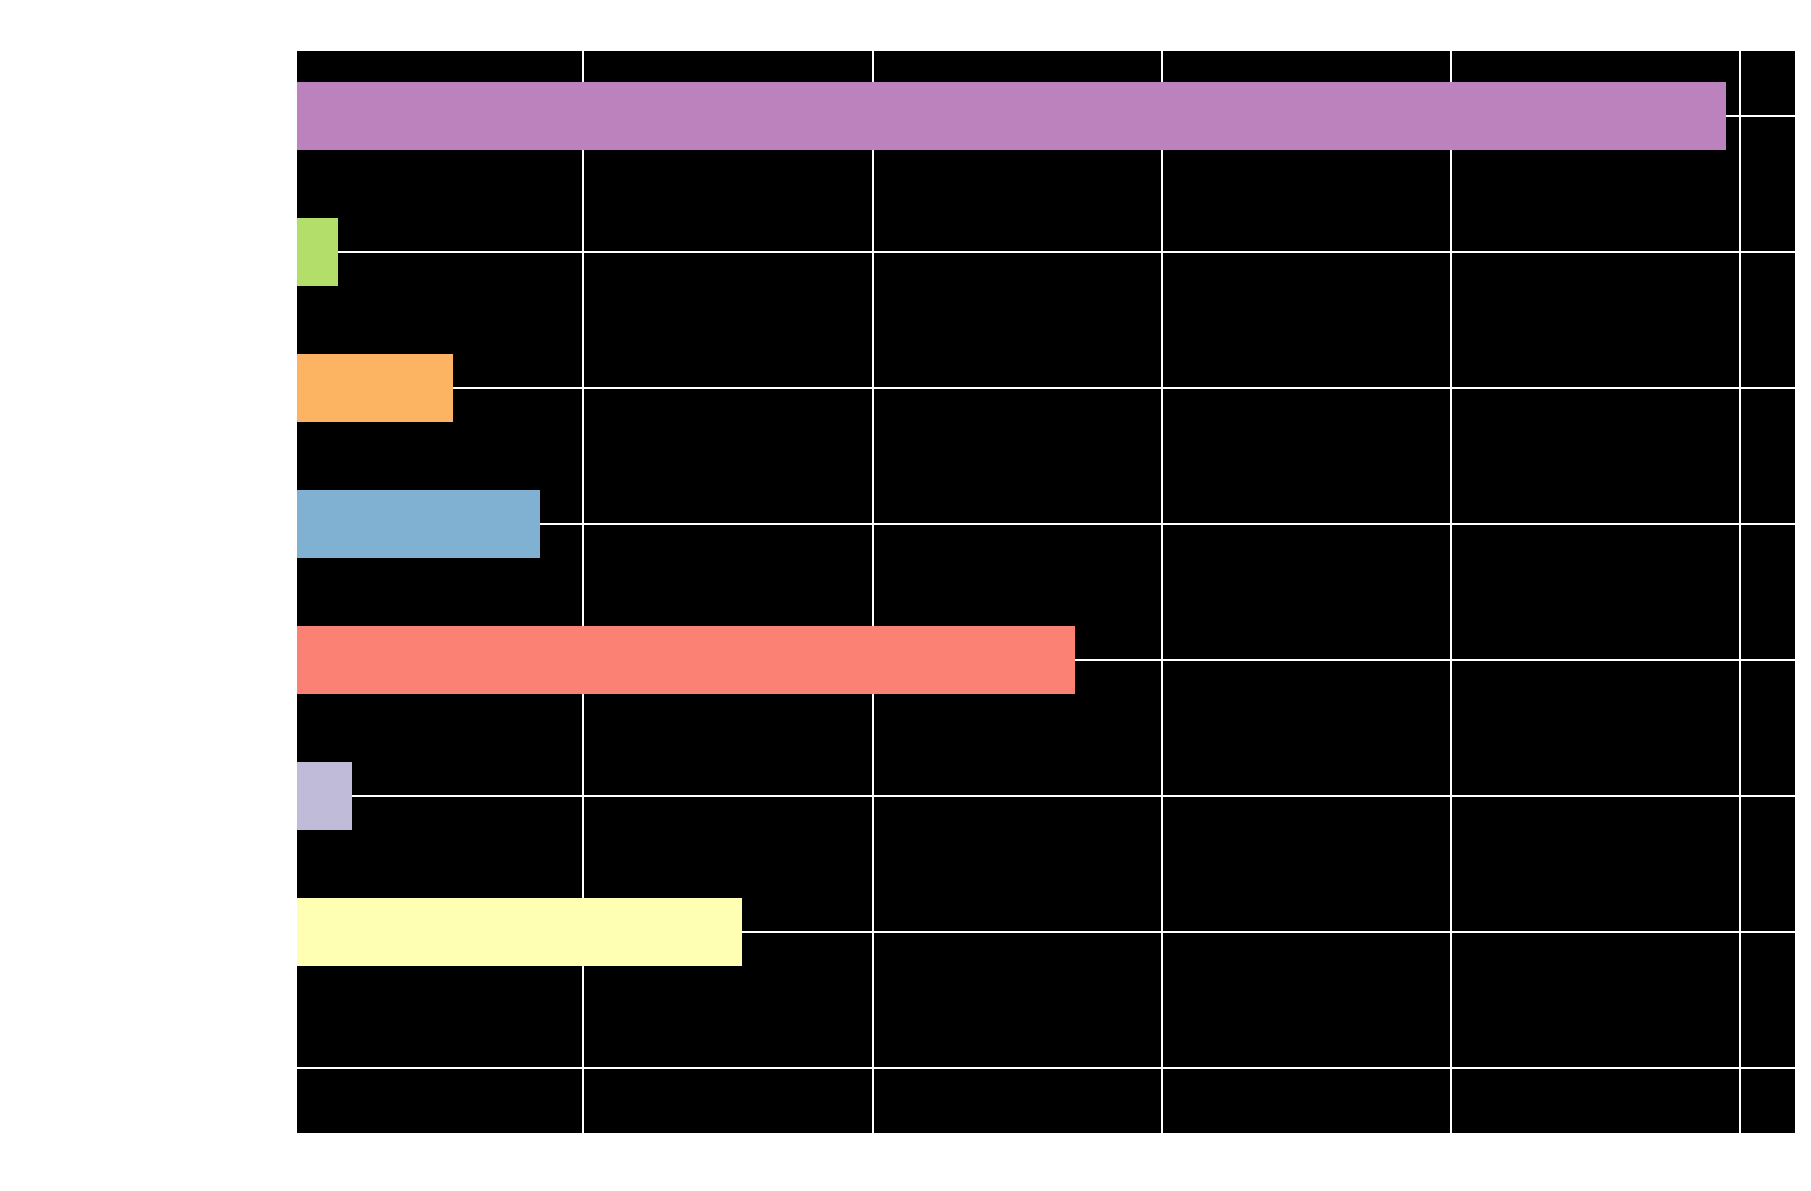

In [70]:
print data.groupby(['category']).need_python.sum()
data.groupby(['category']).need_python.sum().plot(kind='barh', figsize=(12, 10), title='Python mentioned in Job Desc', fontsize=18)

category
admin          0
analyst       47
contract       4
engineer      59
intern         8
management    18
other         10
scientist     61
Name: need_sql, dtype: int64


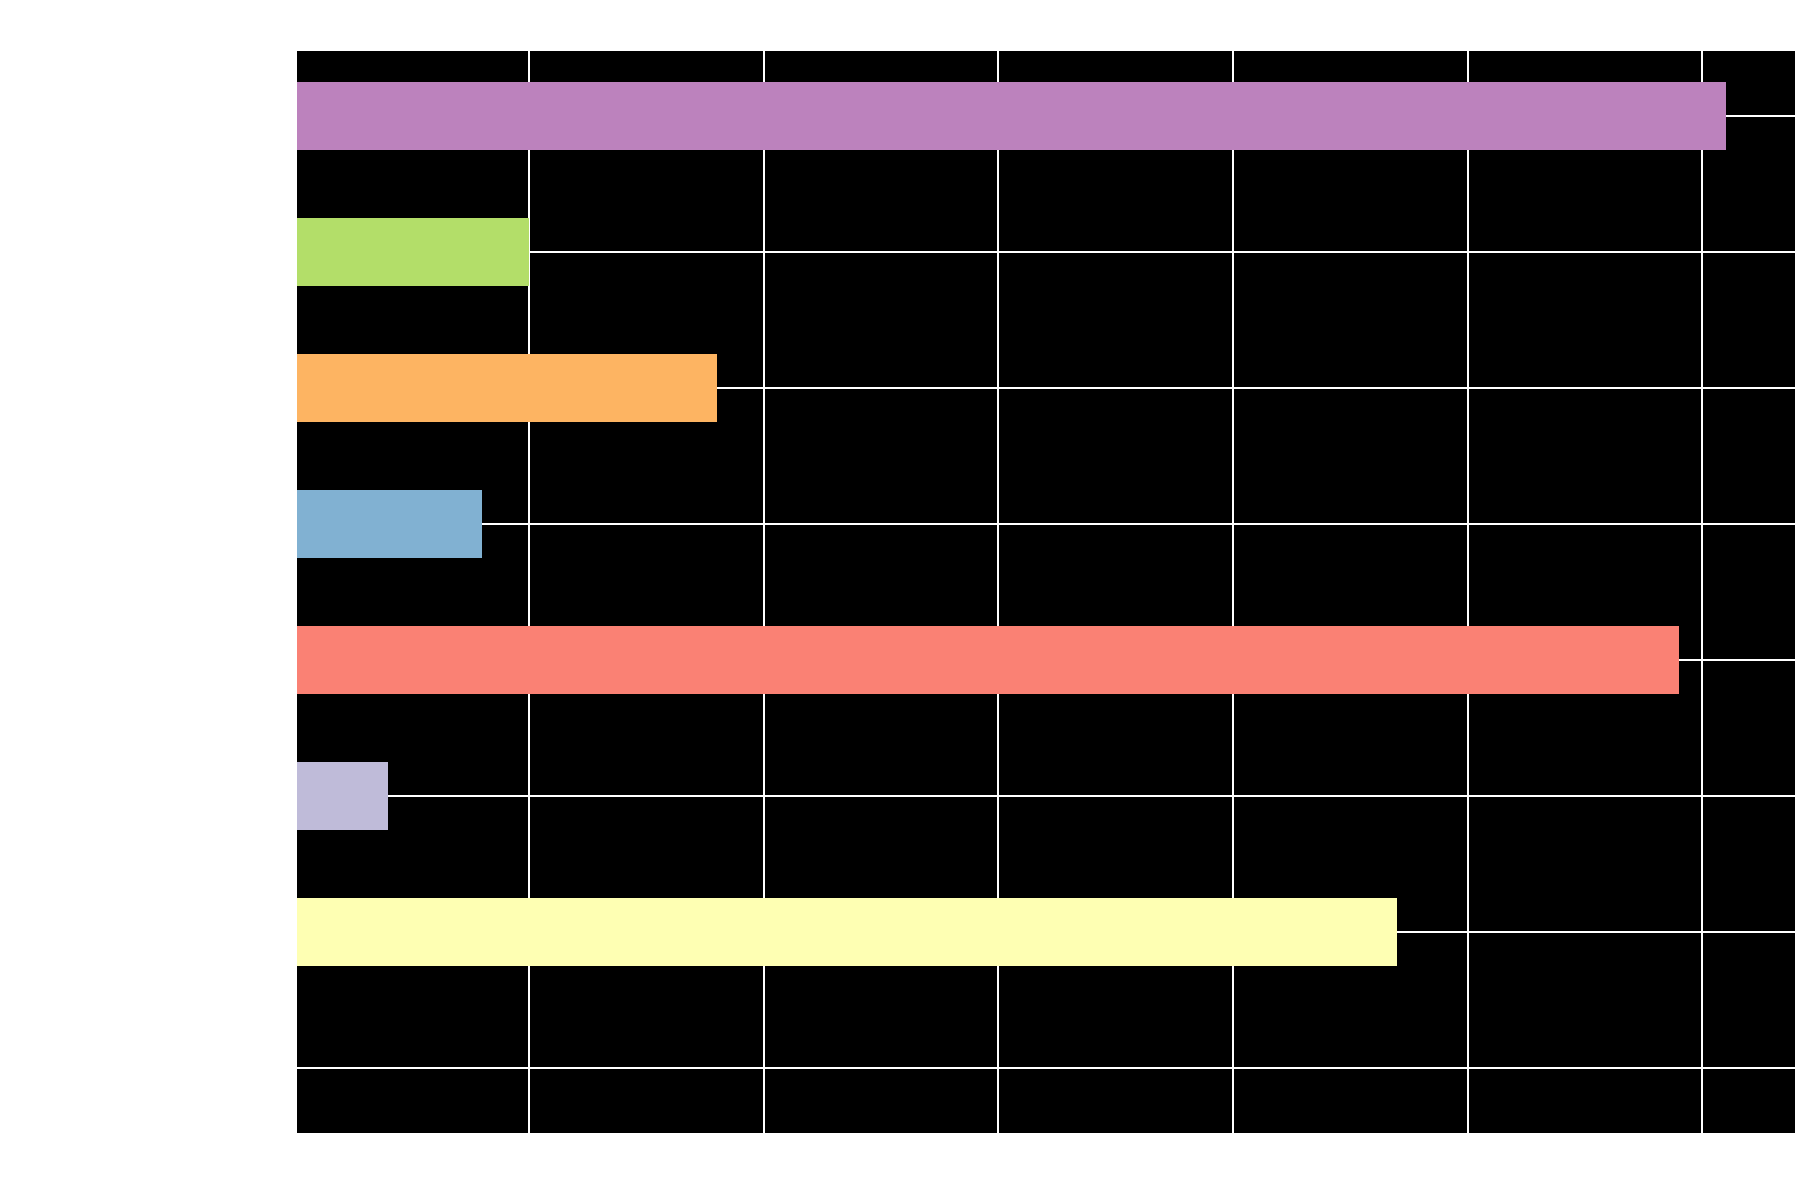

In [71]:
print data.groupby(['category']).need_sql.sum()
data.groupby(['category']).need_sql.sum().plot(kind='barh', figsize=(12, 10), title='SQL mentioned in Job Desc', fontsize=18)

category
admin          0
analyst       12
contract       3
engineer      51
intern         9
management     8
other          3
scientist     54
Name: need_java, dtype: int64


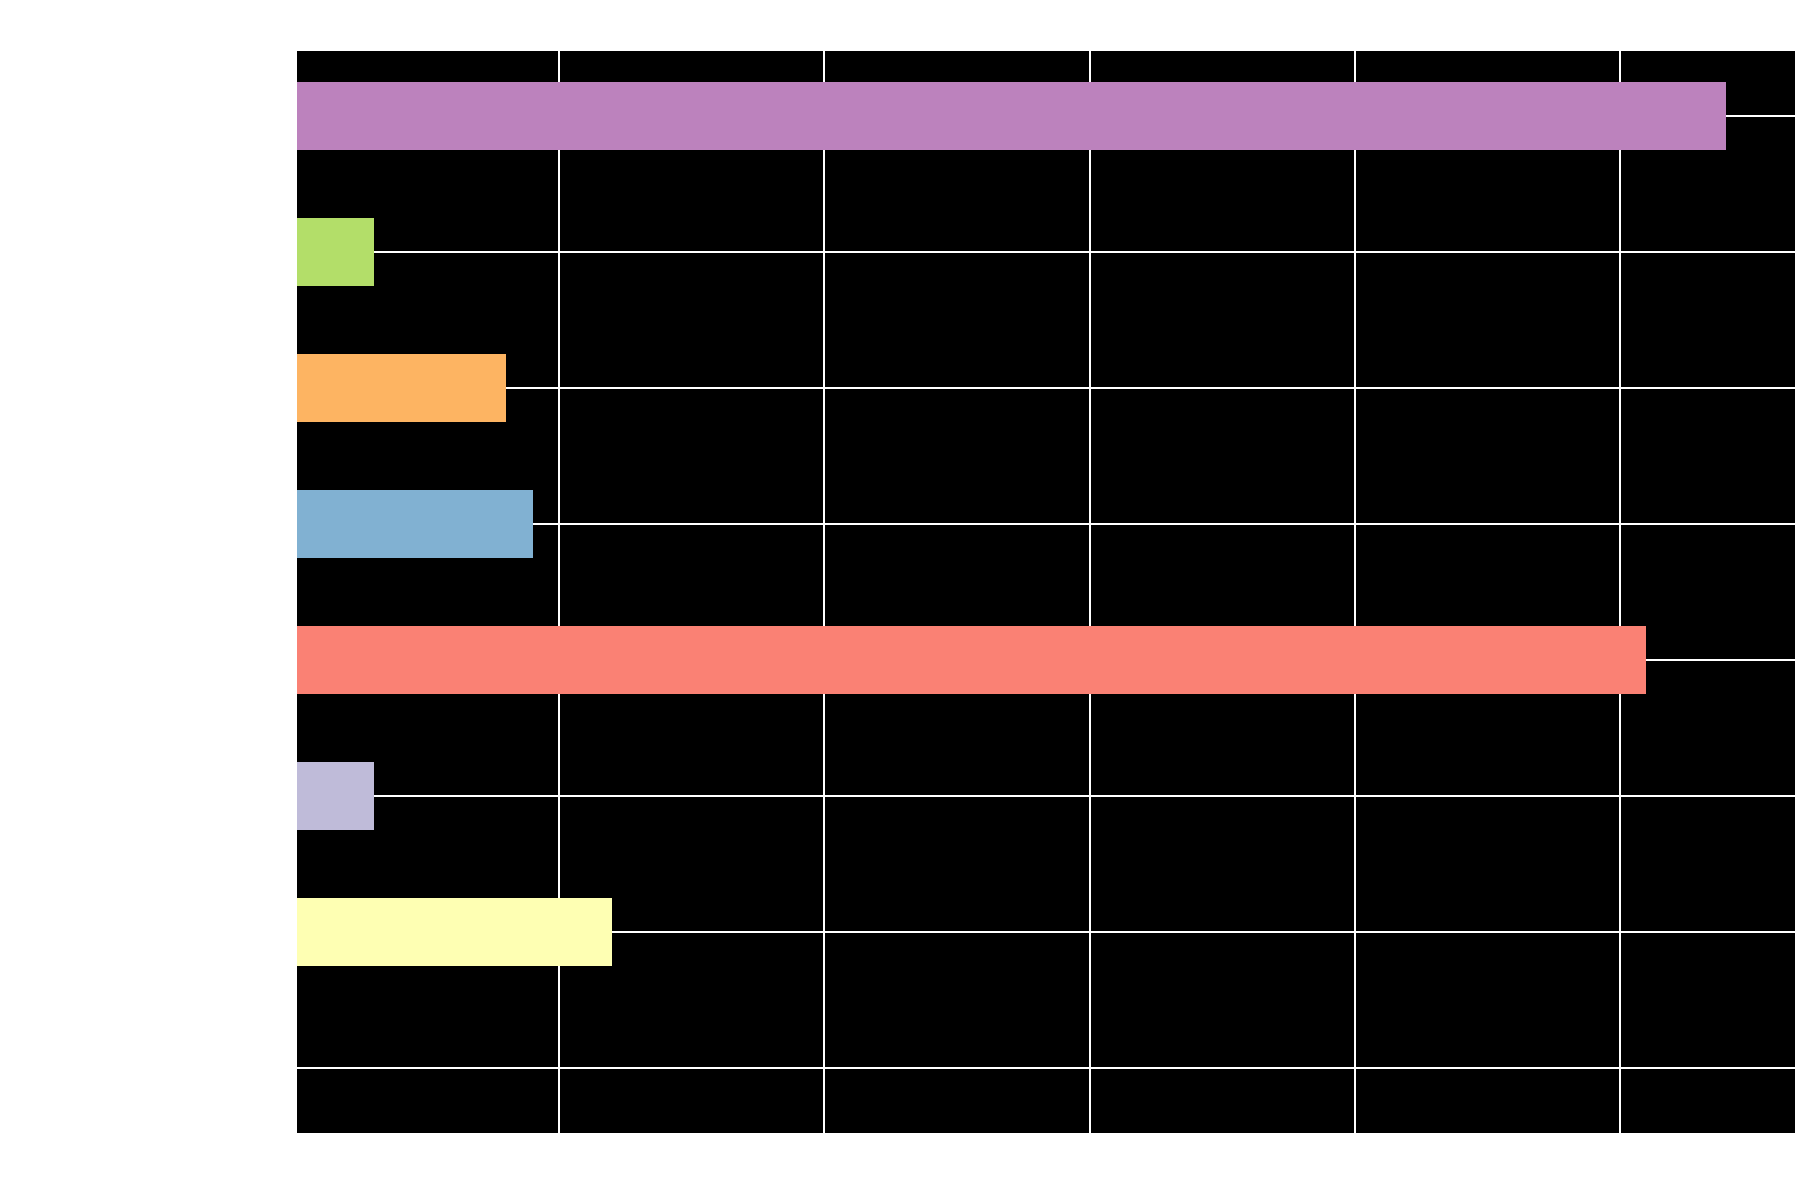

In [72]:
print data.groupby(['category']).need_java.sum()
data.groupby(['category']).need_java.sum().plot(kind='barh', figsize=(12, 10), title='Java mentioned in Job Desc', fontsize=18)

category
admin          0
analyst       13
contract       2
engineer      36
intern         2
management     6
other          2
scientist     49
Name: need_hadoop, dtype: int64


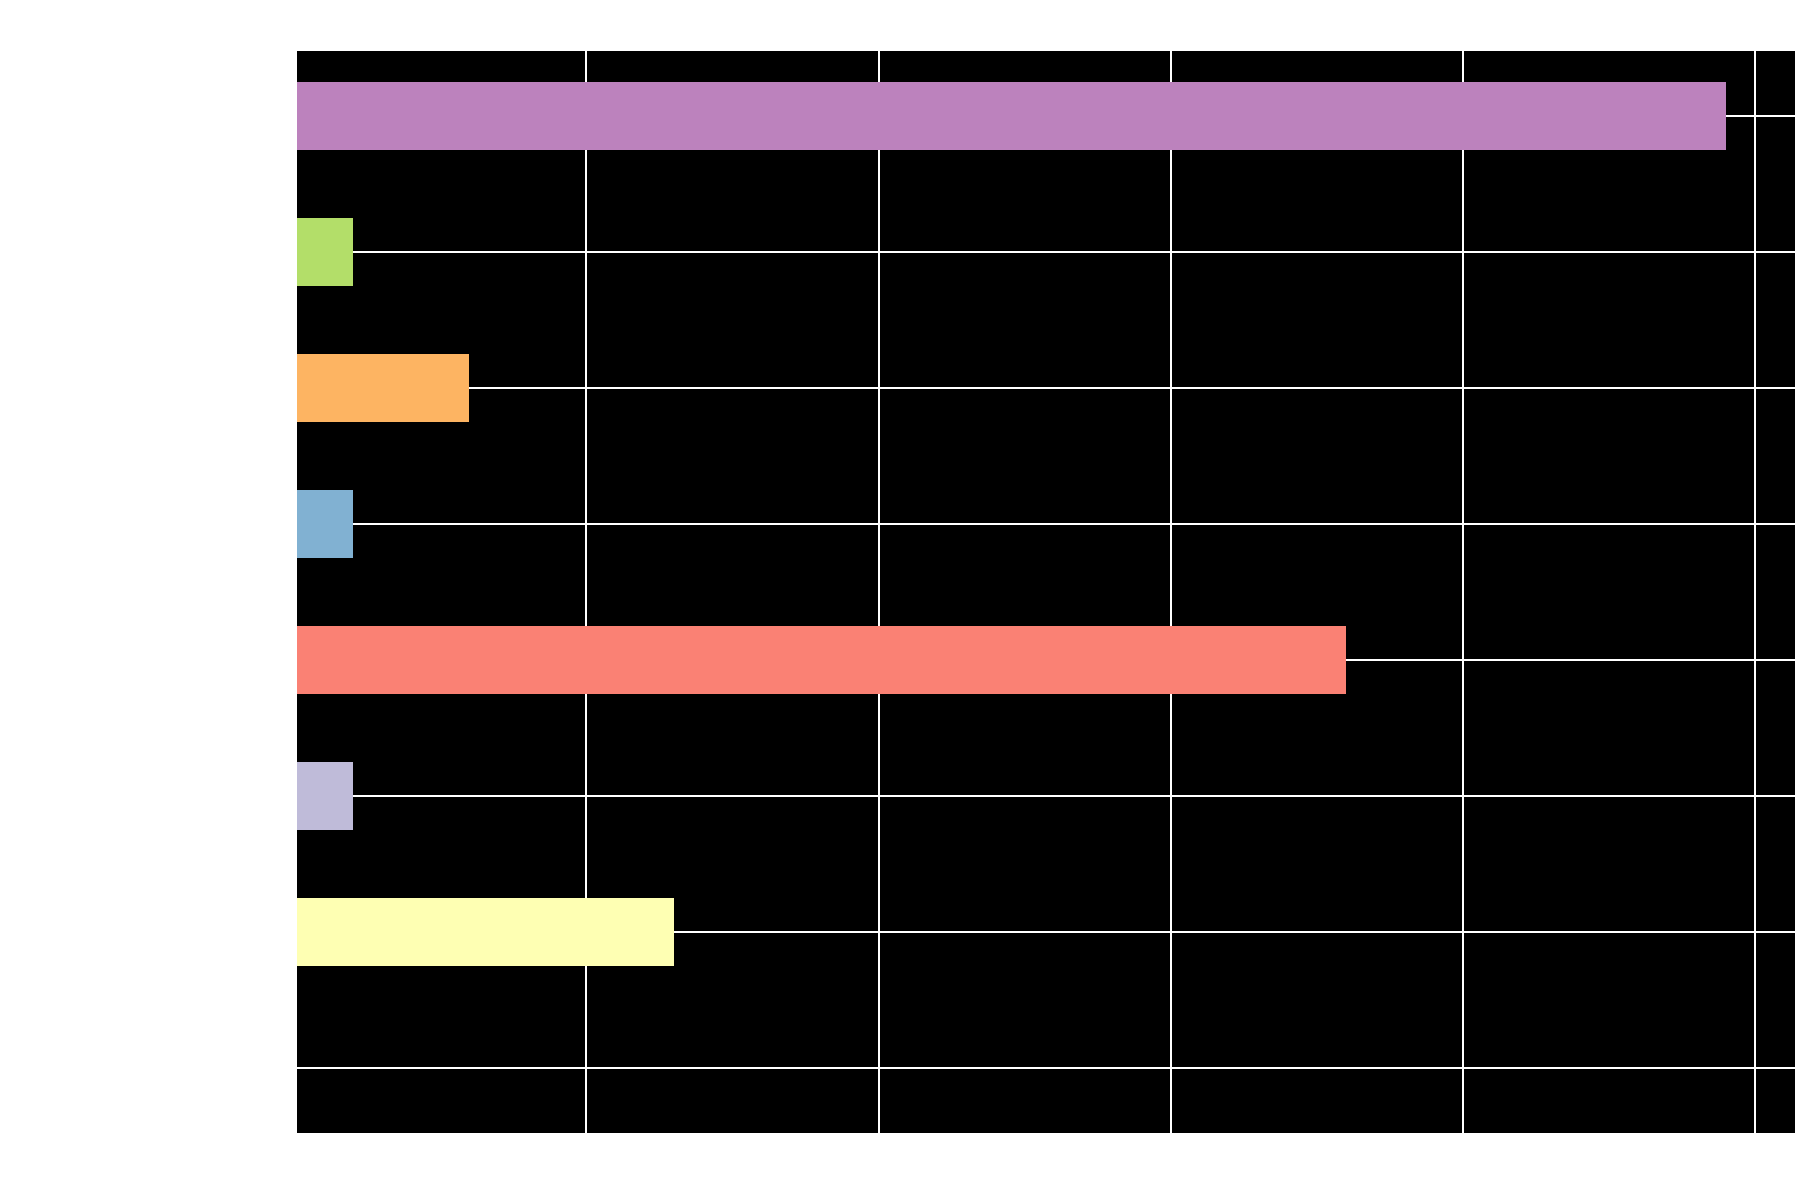

In [73]:
print data.groupby(['category']).need_hadoop.sum()
data.groupby(['category']).need_hadoop.sum().plot(kind='barh', figsize=(12, 10), title='Hadoop mentioned in Job Desc', fontsize=18)

In [74]:
# Decided to take the data analyst, engineer and scientist role as they are about the same
# engineer jobs      160
# scientist jobs     132
# analyst jobs       105
# These are the numbers from checking the job distribution via category

In [75]:
engineer_only = data[data['category'] == 'engineer'].copy()
scientist_only = data[data['category'] == 'scientist'].copy()
analyst_only = data[data['category'] == 'analyst'].copy()

data_only = pd.concat([engineer_only, scientist_only])
data_only = pd.concat([data_only, analyst_only])

In [76]:
# check the numbers
print len(engineer_only)
print len(scientist_only)
print len(analyst_only)
print len(data_only)

160
132
105
397


In [77]:
# checking to make sure they have been combined proper
data_only.head()

,company,job_title,job_desc,salary,category,need_python,need_java,need_sql,need_hadoop,salary_range
0,THOUGHTWORKS PTE LTD,SENIOR DATA ENGINEER,roles responsibilities singapore singaporethou...,8450.0,engineer,0,1,1,1,8k - 9k
2,ADDSTONES SAS,DATA ENGINEER,roles responsibilities gfi is an international...,7500.0,engineer,1,1,1,1,7k - 8k
11,COMPANY UNDISCLOSED,DATA WAREHOUSE AND REPORTING SPECIALIST,roles responsibilities applicants have to appl...,10500.0,engineer,0,0,0,0,>10k
22,TECHCOM SOLUTIONS & CONSULTANCY PTE LTD,BI DEVELOPER,roles responsibilities support day to day oper...,6750.0,engineer,0,0,1,0,6k - 7k
24,HTZ RESOURCES,"NETWORK ENGINEER, SECURITY & DATA ENTREPRISE",roles responsibilities your new role we are lo...,6000.0,engineer,0,0,0,0,6k - 7k


In [78]:
data_only.isnull().sum()

company         0
job_title       0
job_desc        0
salary          0
category        0
need_python     0
need_java       0
need_sql        0
need_hadoop     0
salary_range    0
dtype: int64

## QUESTION 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:

NLP
Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
Ensemble methods and decision tree models
SVM models
Whatever you decide to use, the most important thing is to justify your choices and interpret your results. Communication of your process is key. Note that most listings DO NOT come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression, SGDClassifier 
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.svm import SVC

import string

Using job desc to as a factor to predict salary
<br> Logistic regression model will be carried out 1) without the stop words 2) with the stop words

### CountVectorization/Logistic Regression with some tuning

In [129]:
# Pipeline for basic model
# establishing the stop words list
stop = stopwords.words('english')

# tunring the logistic regression using multi_class and solver
pipeline_base = Pipeline([('cv', CountVectorizer(stop_words=stop,ngram_range=(2,3))), ('clf', LogisticRegression(solver = 'newton-cg',multi_class = 'multinomial'))])

In [130]:
#Train/Test Models
X = data_only['job_desc']
y = data_only['salary_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print len(X_train)
print len(X_test)

277
120


In [131]:
# fit the model
pipeline_base.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 3), preprocessor=None,
        stop_words=[u'i', u'm...ty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False))])

In [132]:
pipeline_base.score(X_test, y_test)

0.25833333333333336

In [133]:
#compare against cross validation
cv_score = cross_val_score(pipeline_base, X_train, y_train, cv=5)
print cv_score

[0.30508475 0.28070175 0.19298246 0.26415094 0.25490196]


Ok now what are the top 10 keywords? (Note: This one is purely using CountVectorization only!!)

In [134]:
#top 10 keywords
cvec = CountVectorizer(stop_words=stop, ngram_range=(2,3))
cvec.fit(X_train)
X_train_cvec = cvec.transform(X_train) # transform the train
X_test_cvec = cvec.transform(X_test) # transform the test

# number of features created
print '# of features: {}'.format(len(cvec.get_feature_names()))

# check the number of words that appears for each groups
X_train_df = pd.DataFrame(X_train_cvec.todense(), columns=cvec.get_feature_names())
wordcounts = X_train_df.sum(axis=0)
wordcounts.sort_values(ascending=False).head(10)

# of features: 78223


anal ytics                319
machine learning          247
roles responsibilities    174
big data                  134
data anal                 133
computer science          128
data anal ytics           128
data science              125
stake holders              89
visual ization             87
dtype: int64

## TOP 10 keywords from PIPELINE

In [135]:
vectorizer = pipeline_base.named_steps['cv']
clf = pipeline_base.named_steps['clf']
    
features_names = vectorizer.get_feature_names()
features_names = np.asarray(features_names)

classes = data_only['salary_range'].unique()

print('Number of features: {} \n'.format(len(features_names)))
    
try:
    if len(classes) > 2:
        for i, label in enumerate(classes):
            top10 = np.argsort(clf.coef_[i])[-10:]
            print 'Top 10 Keywords found in: {}'.format(label)
            print '------------------------'
            for keyword in features_names[top10]:
                print keyword
            print '\n'
    else:
        top10 = np.argsort(clf.coef_[0])[-10:] 
        print('Top 10 Keywords found in %s:' % (classes[1]))
        print '------------------------'
        for keyword in features_names[top10]:
            print keyword
except:
    top10 = np.argsort(clf.feature_importances_)[-10:]
    print('Top 10 Keywords found in %s:' % (classes[1]))
    print '------------------------'
    for keyword in features_names[top10]:
        print keyword

Number of features: 78223 

Top 10 Keywords found in: 8k - 9k
------------------------
data engineering
big data
opportunities requirements
opportunities requirements skill
progression opportunities requirements
type full
type full time
job type
job type full
full time


Top 10 Keywords found in: 7k - 8k
------------------------
masters degree computer
trouble shoot
site support
send resume
relevant working
incident management
confer encing
data center
computer science
iv iv


Top 10 Keywords found in: >10k
------------------------
tr td
tr td essential
table body
body tr
shooting skill td
td tr body
body table
skill td
skill td tr
td tr


Top 10 Keywords found in: 6k - 7k
------------------------
trouble shooting
local regulatory
degree diploma
strong plus
minimum diploma
years relevant
data analysis
minimum years
credit risk
requirements minimum


Top 10 Keywords found in: 5k - 6k
------------------------
analyst scientist
scientist sql
excel programming
scientist sql excel
sql excel

### Turning the TOP 10 features into fuctions for easy usage (CountVectorization ONLY/With PIPELINE)

In [136]:
#write a funcion for top 10 keywords
def top10keywords(cvec,X_train):
    cvec.fit(X_train)
    X_train_cvec = cvec.transform(X_train) # transform the train
    X_test_cvec = cvec.transform(X_test) # transform the test

    # number of features created
    print '# of features: {}'.format(len(cvec.get_feature_names()))

    # check the number of words that appears for each groups
    X_train_df = pd.DataFrame(X_train_cvec.todense(), columns=cvec.get_feature_names())
    wordcounts = X_train_df.sum(axis=0)
    print wordcounts.sort_values(ascending=False).head(10)

In [137]:
cvec = CountVectorizer(stop_words=stop, ngram_range=(2,3))
top10keywords(cvec,X_train)

# of features: 78223
anal ytics                319
machine learning          247
roles responsibilities    174
big data                  134
data anal                 133
computer science          128
data anal ytics           128
data science              125
stake holders              89
visual ization             87
dtype: int64


In [138]:
def top10keys_FromPipe(pipe_model, classes):
    vectorizer = pipe_model.named_steps['cv']
    clf = pipe_model.named_steps['clf']
    
    features_names = vectorizer.get_feature_names()
    features_names = np.asarray(features_names)
    
    print('Number of features: {} \n'.format(len(features_names)))
    
    try:
        if len(classes) > 2:
            for i, label in enumerate(classes):
                top10 = np.argsort(clf.coef_[i])[-10:]
                print 'Top 10 Keywords found in: {}'.format(label)
                print '------------------------'
                for keyword in features_names[top10]:
                    print keyword
                print '\n'
        else:
            top10 = np.argsort(clf.coef_[0])[-10:] 
            print('Top 10 Keywords found in %s:' % (classes[1]))
            print '------------------------'
            for keyword in features_names[top10]:
                print keyword
    except:
        top10 = np.argsort(clf.feature_importances_)[-10:]
        print('Top 10 Keywords found in %s:' % (classes[1]))
        print '------------------------'
        for keyword in features_names[top10]:
            print keyword

In [139]:
print data_only['salary_range'].unique()
top10keys_FromPipe(pipeline_base, classes=data_only['salary_range'].unique())

['8k - 9k' '7k - 8k' '>10k' '6k - 7k' '5k - 6k' '3k - 4k' '2k - 5k'
 '9k - 10k' '2k - 3k' '1k - 2k' '<1k']
Number of features: 78223 

Top 10 Keywords found in: 8k - 9k
------------------------
data engineering
big data
opportunities requirements
opportunities requirements skill
progression opportunities requirements
type full
type full time
job type
job type full
full time


Top 10 Keywords found in: 7k - 8k
------------------------
masters degree computer
trouble shoot
site support
send resume
relevant working
incident management
confer encing
data center
computer science
iv iv


Top 10 Keywords found in: >10k
------------------------
tr td
tr td essential
table body
body tr
shooting skill td
td tr body
body table
skill td
skill td tr
td tr


Top 10 Keywords found in: 6k - 7k
------------------------
trouble shooting
local regulatory
degree diploma
strong plus
minimum diploma
years relevant
data analysis
minimum years
credit risk
requirements minimum


Top 10 Keywords found in: 5k - 

Note to self: Fine tuning the keywords is required.

### CountVectorization/Logistic Regression with some additional tuning

In [140]:
# Tuning the stop words
# adding new stop words i.e common words that appear in job desc and won't help with the prediction
add_stop = ['license',
            'registration',
            'new',
            'offer',
            'become',
            'opportunities',
            'permanent',
            'job',
            'type',
            'work',
            'full',
            'time',
            'learning',
            'role',
            'responsibilities',
            'skill',
            'strong',
            'requirements', 
            'years experience', 
            'candidates', 
            'notified', 
            'least',
            'most',
            'years', 
            'shortlisted',
            'international',
            'service'
            'edu', 
            'sg', 
            'experience',
            'platform',
            'please',
            'email',
            'send',
            'resume',
            'data',
            'body',
            'of',
            'tr',
            'td',
            'tr',
            'iv']

for word in add_stop:
    stop.append(word)
    
print stop

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u"you're", u"you've", u"you'll", u"you'd", u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u"she's", u'her', u'hers', u'herself', u'it', u"it's", u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u"that'll", u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'eac

In [141]:
pipeline_tuned = Pipeline([('cv', CountVectorizer(stop_words=stop, ngram_range=(2,3))), 
                           ('clf', LogisticRegression(solver = 'newton-cg',multi_class = 'multinomial', random_state=42))])

In [142]:
pipeline_tuned.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 3), preprocessor=None,
        stop_words=[u'i', u'm...alty='l2', random_state=42, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False))])

In [143]:
pipeline_tuned.score(X_test, y_test)

0.2833333333333333

In [144]:
#compare against cross validation
cv_score = cross_val_score(pipeline_tuned, X_train, y_train, cv=5)
print cv_score

[0.28813559 0.29824561 0.1754386  0.24528302 0.19607843]


Ok now what are the top 10 keywords? (Note: This one is purely using CountVectorization only!!)

In [145]:
cvec = CountVectorizer(stop_words=stop, ngram_range=(2,3))
top10keywords(cvec,X_train)

# of features: 73675
anal ytics          319
computer science    128
visual ization       87
auto mation          59
script ing           52
predict ive          52
mode lling           48
problem solving      45
table au             44
ai ml                43
dtype: int64


Once more Top 10 keywords from PIPELINE!

In [146]:
top10keys_FromPipe(pipeline_tuned, classes=data_only['salary_range'].unique())

Number of features: 73675 

Top 10 Keywords found in: 8k - 9k
------------------------
capability offered according
performance end inter
offered according
candidate performance
offered according candidate
english capability offered
candidate performance end
according candidate performance
end inter nship
performance end


Top 10 Keywords found in: 7k - 8k
------------------------
incident management batch
masters degree
technical issues
trouble shoot
masters degree computer
confer encing
site support
incident management
relevant working
computer science


Top 10 Keywords found in: >10k
------------------------
business units
orient ed
basic knowledge
large complex
natural language
health care
shooting table
table essential
trouble shooting table
table essential duties


Top 10 Keywords found in: 6k - 7k
------------------------
software installation
minimum working
diploma computer
diploma computer science
multi task
local regulatory
degree diploma
minimum diploma
trouble shooting
cre

### What if the stop words were left out entirely? And there was no tuning involved?

In [147]:
pipeline_0 = Pipeline([('cv', CountVectorizer()), ('clf', LogisticRegression())])

In [148]:
# fit the model
pipeline_0.fit(X_train, y_train)
pipeline_0.score(X_test, y_test)

0.20833333333333334

In [149]:
#compare against cross validation
cv_score = cross_val_score(pipeline_tuned, X_train, y_train, cv=5)
print cv_score

[0.28813559 0.29824561 0.1754386  0.24528302 0.19607843]


In [150]:
cvec = CountVectorizer()
top10keywords(cvec,X_train)

# of features: 5345
and           4839
to            2335
data          2096
the           1941
in            1916
of            1796
with          1343
experience     937
for            905
or             761
dtype: int64


In [151]:
top10keys_FromPipe(pipeline_0, classes=data_only['salary_range'].unique())

Number of features: 5345 

Top 10 Keywords found in: 8k - 9k
------------------------
want
students
time
set
big
are
inter
job
who
work


Top 10 Keywords found in: 7k - 8k
------------------------
work
will
technical
resume
our
it
iv
issues
we
or


Top 10 Keywords found in: >10k
------------------------
customer
like
table
health
sets
td
body
tr
prove
on


Top 10 Keywords found in: 6k - 7k
------------------------
information
would
credit
engineering
our
clients
plus
process
diploma
minimum


Top 10 Keywords found in: 5k - 6k
------------------------
promote
job
clinical
analyst
is
team
position
campaign
community
applications


Top 10 Keywords found in: 3k - 4k
------------------------
manufacturing
etl
developing
non
mobile
application
visual
power
an
technologies


Top 10 Keywords found in: 2k - 5k
------------------------
or
equivalent
an
license
personnel
wai
r1330726
wen
91c2918
investment


Top 10 Keywords found in: 9k - 10k
------------------------
professional
partner
master
t

The takeaway: Stop words are important. But striking the balance of what additional stop words to add is crucial.

## Tokenization

In [152]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

def tokenize_test(cvec,X_train,X_test,y_train,y_test):
    X_train_vec=cvec.fit_transform(X_train)
    # X_train_vec=cvec.transform(X_train)
    X_test_vec=cvec.transform(X_test)
    print X_train_vec.shape[1],'Features'
    nb=MultinomialNB()
    nb.fit(X_train_vec,y_train)
    y_pred=nb.predict(X_test_vec)
    print 'Accuracy: ',metrics.accuracy_score(y_test,y_pred)
    print 'MultinomialNB Classification Report:\n',metrics.classification_report(y_test,y_pred)

In [153]:
cvec = CountVectorizer(stop_words='english', ngram_range=(2,3))
tokenize_test(cvec,X_train,X_test,y_train,y_test)

75558 Features
Accuracy:  0.25833333333333336
MultinomialNB Classification Report:
             precision    recall  f1-score   support

    1k - 2k       1.00      0.57      0.73         7
    2k - 3k       0.25      0.25      0.25         4
    2k - 5k       0.14      0.14      0.14        22
    3k - 4k       0.50      0.23      0.32        13
    5k - 6k       0.07      0.06      0.07        16
    6k - 7k       0.24      0.87      0.37        15
    7k - 8k       0.20      0.12      0.15         8
    8k - 9k       0.33      0.07      0.12        14
   9k - 10k       0.75      1.00      0.86         3
        <1k       0.00      0.00      0.00         1
       >10k       0.25      0.06      0.10        17

avg / total       0.29      0.26      0.22       120



## QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:

What components of a job posting distinguish data scientists from other data jobs?
What features are important for distinguishing junior vs. senior positions?
Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?
You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.

### DATA SCIENTIST VS DATA ENGINEER VS DATA ANALYST

In [346]:
# Data Scientist VS Data Engineer VS Data Analyst
# Checking our data_only data, there should be no issues as we did not make changes to the dataframe in Q1
# Check 
print len(data_only)
print '------------------------'
print data_only.isnull().sum()
print '------------------------'
print data_only['category'].value_counts()

397
------------------------
company         0
job_title       0
job_desc        0
salary          0
category        0
need_python     0
need_java       0
need_sql        0
need_hadoop     0
salary_range    0
dtype: int64
------------------------
engineer     160
scientist    132
analyst      105
Name: category, dtype: int64


Everything is in order, so moving on...

In [398]:
# defining the parameters
X = data_only['job_desc']
y = data_only['category']

#Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Using the previous pipeline CountVectorization/Logistic Regression. How does the model turn up? <p>
<b>The pipeline build: </b><br>
<div>pipeline_tuned = Pipeline([('cv', CountVectorizer(stop_words=stop, ngram_range=(1,3))), <br>
                           ('clf', LogisticRegression(solver = 'newton-cg',multi_class = 'multinomial', random_state=42))])
</div>

In [373]:
print stop

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u"you're", u"you've", u"you'll", u"you'd", u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u"she's", u'her', u'hers', u'herself', u'it', u"it's", u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u"that'll", u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'eac

In [374]:
pipeline_tuned = Pipeline([('cv', CountVectorizer(stop_words=stop, ngram_range=(2,2))), 
                           ('clf', LogisticRegression(solver = 'newton-cg',multi_class = 'multinomial', class_weight='balanced', random_state=42))])

In [375]:
pipeline_tuned.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 2), preprocessor=None,
        stop_words=[u'i', u'm...
          random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False))])

In [376]:
pipeline_tuned.score(X_test, y_test)

0.7083333333333334

In [377]:
#compare against cross validation
cv_score = cross_val_score(pipeline_tuned, X_train, y_train, cv=5)
print cv_score

[0.73214286 0.67857143 0.65454545 0.54545455 0.70909091]


In [378]:
top10keys_FromPipe(pipeline_tuned, classes=data_only['category'].unique())

Number of features: 32967 

Top 10 Keywords found in: engineer
------------------------
credit risk
complex sets
analyst scientist
anal ytics
table au
quantitative analyst
infotrie analyze
scientist infotrie
table essential
shooting table


Top 10 Keywords found in: scientist
------------------------
big visual
software engineering
operating systems
diploma computer
deploy ment
pipe line
back end
trouble shooting
pipe lines
auto mation


Top 10 Keywords found in: analyst
------------------------
big anal
inter nship
performance end
according candidate
candidate performance
capability offered
offered according
end inter
anal ytics
computer science




In [379]:
cvec = CountVectorizer(stop_words='english', ngram_range=(2,3))
tokenize_test(cvec,X_train,X_test,y_train,y_test)

75558 Features
Accuracy:  0.6916666666666667
MultinomialNB Classification Report:
             precision    recall  f1-score   support

    analyst       0.74      0.52      0.61        33
   engineer       0.82      0.67      0.74        55
  scientist       0.56      0.91      0.69        32

avg / total       0.73      0.69      0.69       120



## How does it compare to TF-idf/Logistic Regression?
We can see the using job desc to distinguish between Data Analyst, Data Engineer and Data Scientist does better than using job desc to estimate the salary. But how does it fare if we were to use TF-idf instead?

In [400]:
pipeline_tfidf = Pipeline([('cv', TfidfVectorizer(stop_words=stop, ngram_range=(2,2))),
                           ('clf', LogisticRegression(solver = 'newton-cg',multi_class = 'multinomial', class_weight='balanced', random_state=42))])

In [401]:
pipeline_tfidf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('cv', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 2), norm=u'l2', preprocessor=None, smooth_idf=True,
...
          random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False))])

In [402]:
pipeline_tfidf.score(X_test, y_test)

0.7083333333333334

In [403]:
#compare against cross validation
cv_score = cross_val_score(pipeline_tfidf, X_train, y_train, cv=5)
print cv_score

[0.73214286 0.75       0.61818182 0.61818182 0.78181818]


TF-idf actually did a better than CountVectorizer but let's see what's the Top 10 Keywords the model produces.

In [404]:
top10keys_FromPipe(pipeline_tfidf, classes=data_only['category'].unique())

Number of features: 32967 

Top 10 Keywords found in: engineer
------------------------
business analyst
ing industry
industry analyst
table au
complex sets
credit risk
anal ytics
govern ance
basic knowledge
staff ing


Top 10 Keywords found in: scientist
------------------------
net working
big platforms
confer encing
pipe line
application development
operating systems
test auto
back end
trouble shooting
auto mation


Top 10 Keywords found in: analyst
------------------------
science statistics
machine technique
advanced anal
computer science
predict ive
deep machine
big anal
ai ml
ml aa
anal ytics




In [405]:
tfidf = TfidfVectorizer(stop_words=stop, ngram_range=(2,2))
tokenize_test(tfidf,X_train,X_test,y_train,y_test)

32967 Features
Accuracy:  0.65
MultinomialNB Classification Report:
             precision    recall  f1-score   support

    analyst       0.71      0.15      0.25        33
   engineer       0.69      0.78      0.74        55
  scientist       0.59      0.94      0.72        32

avg / total       0.67      0.65      0.60       120



In this case, the TF-IDF's accuracy was less when compared to CountVectorize.

## Junior vs Senior roles

In [406]:
#First thing first, convert all the job title to lowercase
data['job_title']=data['job_title'].str.lower()

sr_role = data[data['job_title'].str.contains('senior|sr')].copy()
print '# of Senior roles: {}'.format(len(sr_role))

# of Senior roles: 86


In [407]:
sr_role.head()

,company,job_title,job_desc,salary,category,need_python,need_java,need_sql,need_hadoop,salary_range
0,THOUGHTWORKS PTE LTD,senior data engineer,roles responsibilities singapore singaporethou...,8450.0,engineer,0,1,1,1,8k - 9k
3,PM ASIA PROJECT SERVICES PTE LTD,senior building services engineer (data centre),roles responsibilities overall job objectives ...,6750.0,management,0,0,0,0,6k - 7k
13,COMPANY UNDISCLOSED,senior data analyst (jd#4216),roles responsibilities job summary great oppor...,6000.0,analyst,1,0,0,1,6k - 7k
17,DBS BANK LTD,"avp / senior associate, lead development engin...",roles responsibilities manage the avaloq confi...,8250.0,management,0,0,1,0,8k - 9k
18,DBS BANK LTD,"avp / senior assoc, data scientist - data anal...",roles responsibilities business function group...,8000.0,scientist,1,0,0,0,8k - 9k


In [408]:
jr_role = data[data['job_title'].str.contains('junior|jr|assistant|asst|entry')].copy()
print '# of Junior roles: {}'.format(len(jr_role))

# of Junior roles: 34


In [409]:
jr_role.head()

,company,job_title,job_desc,salary,category,need_python,need_java,need_sql,need_hadoop,salary_range
310,AIA SINGAPORE PRIVATE LIMITED,"executive / assistant manager, actuarial (fi...",the incumbent will perform regular ev and onb ...,5750.0,management,0,0,0,0,5k - 6k
316,THATZ INTERNATIONAL PTE LTD,"assistant consulting manager, it enterprise so...",to promote and market that z 2 0 core compete ...,3500.0,management,0,0,0,0,3k - 4k
364,CHEE SONG FROZEN FOOD PTE LTD,cold room assistant,picking and packing of products according to d...,1650.0,other,0,0,0,0,1k - 2k
369,LOURDES GAVIN PTE LTD,engineering assistant (mechanical / mechatronic),assemble mechanical and elect ro mechanical co...,1950.0,engineer,0,0,0,0,1k - 2k
370,KELLY SERVICES (SINGAPORE) PTE LTD,junior net full stack developer,main responsibilities in close interaction wit...,5750.0,engineer,0,1,1,0,5k - 6k


In [410]:
data_only.job_title.value_counts()

DATA SCIENTIST                                                                                 44
DATA ANALYST                                                                                   33
DATA ENGINEER                                                                                  23
SENIOR DATA ENGINEER                                                                            5
SCIENTIST (DATA ANALYTICS)  /  I2R (A*STAR)                                                     5
BIG DATA ENGINEER                                                                               3
SYSTEM ENGINEER - DATA CENTRE AUTOMATION                                                        3
MARKET DATA BUSINESS ANALYST  /  PROJECT MANAGER                                                3
QUANTITATIVE ANALYST                                                                            3
SALES ENGINEER[INDUSTRIAL AUTOMATION/ELECTRICAL/MACHINE]                                        2
RESEARCH FELLOW     

In [431]:
#create a column to differentiate between the 
sr_role['role'] = 'senior'
jr_role['role'] = 'junior'
# combine the date together
sr_and_jr = pd.concat([sr_role, jr_role], ignore_index=True)

In [432]:
sr_and_jr.head()

,company,job_title,job_desc,salary,category,need_python,need_java,need_sql,need_hadoop,salary_range,role
0,THOUGHTWORKS PTE LTD,senior data engineer,roles responsibilities singapore singaporethou...,8450.0,engineer,0,1,1,1,8k - 9k,senior
1,PM ASIA PROJECT SERVICES PTE LTD,senior building services engineer (data centre),roles responsibilities overall job objectives ...,6750.0,management,0,0,0,0,6k - 7k,senior
2,COMPANY UNDISCLOSED,senior data analyst (jd#4216),roles responsibilities job summary great oppor...,6000.0,analyst,1,0,0,1,6k - 7k,senior
3,DBS BANK LTD,"avp / senior associate, lead development engin...",roles responsibilities manage the avaloq confi...,8250.0,management,0,0,1,0,8k - 9k,senior
4,DBS BANK LTD,"avp / senior assoc, data scientist - data anal...",roles responsibilities business function group...,8000.0,scientist,1,0,0,0,8k - 9k,senior


In [433]:
sr_and_jr['role'].value_counts()

senior    86
junior    34
Name: role, dtype: int64

In [434]:
# I am a little worried about the number of rows so I am going to calculate the baseline
print('Baseline: {}'.format(float(86)/float(34+86)))

Baseline: 0.716666666667


In [435]:
X = sr_and_jr['job_desc']
y = sr_and_jr['role']

In [436]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print '{} : {}'.format(len(X_train),len(X_test))

84 : 36


TF-IDF/LogisticRegression VS CountVectorizer/LogisticRegression

In [503]:
pipeline_tfidf = Pipeline([('cv', TfidfVectorizer(stop_words=stop, ngram_range=(2,2))),
                           ('clf', LogisticRegression(solver = 'newton-cg',multi_class = 'multinomial', class_weight='balanced', random_state=42))])

In [504]:
pipeline_tfidf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('cv', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 2), norm=u'l2', preprocessor=None, smooth_idf=True,
...
          random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False))])

In [514]:
pipeline_tfidf.score(X_test, y_test)

0.8333333333333334

In [530]:
#compare against cross validation
cv_score = cross_val_score(pipeline_tfidf, X_train, y_train, cv=5)
print cv_score

[0.70588235 0.76470588 0.82352941 0.82352941 0.75      ]


In [533]:
cvec =  TfidfVectorizer(stop_words=stop, ngram_range=(2,2))
top10keywords(cvec,X_train)

# of features: 12840
anal ytics          1.738121
ai ml               0.908576
ml aa               0.908576
computer science    0.860315
ad hoc              0.834912
visual ization      0.762671
deploy ment         0.725308
hoc duties          0.662543
micro soft          0.650373
team player         0.644951
dtype: float64


In [534]:
pipeline_cv = Pipeline([('cv', CountVectorizer(stop_words=stop, ngram_range=(2,2))),
                        ('clf', LogisticRegression(solver = 'newton-cg',multi_class = 'multinomial', class_weight='balanced', random_state=42))])

In [535]:
pipeline_cv.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 2), preprocessor=None,
        stop_words=[u'i', u'm...
          random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False))])

In [536]:
pipeline_cv.score(X_test, y_test)

0.8611111111111112

In [538]:
cvec =  CountVectorizer(stop_words=stop, ngram_range=(2,2))
top10keywords(cvec,X_train)

# of features: 12840
anal ytics          57
computer science    28
visual ization      21
deploy ment         20
team player         17
govern ance         17
ml aa               16
ai ml               16
micro soft          15
pipe lines          15
dtype: int64


<b>Summary:</b>
<p>The biggest issue was with the data set as it came from 10 different sources. Cleaning the data espcially the job_desc was difficult and though the job description was cleaned up, the quality was compromised. There were html tags found in the job description. These tags which seperate the element of the website, when mixed into the content made it harder to remove especially when some of the tags were very short. It is easy to miss out when customizing the the keywords to be removed from the anlysis. In the future when creating a dataset from multiple sources, a miximum of 3-4 sources should be enough.
<p>There is an importance to customize the stop words used before analysis. This is to prevent common terms found in the job description to appear in the analysis. One of the common words were 'roles' and 'responsibilities'. There has to be a balance on how stirct we want to adjust the word frequency. One good example is 'team player'. It may be overused but does that mean it should be removed?
<p> Job description was more useful in predicting the job category than when used for salary. However the analysis show the the prediction for Data Scientist is poor. One reason is that the keywords may not be specific enough to the job. The 